In [126]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import time
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

car_name = [] 
car_availability = []
range_car = []
Efficiency = []
Weight = []
speed_0_100 = []
Battery = []
fast_charge = []
Towing = []
Cargo_Vol = []
Price_Range = []
Germany_Price = []
Netherlands_Price = []
United_Kingdom_Price = []
Charging_capability = []
Seats = []
Safety_Rating = []
car_link = []     
pagenum = []

total_time = time.time()


for i in range(0, 118):
    start_time = time.time()
    
    URL = f"https://ev-database.org/#group=vehicle-group&rs-pr=10000_100000&rs-er=0_1000&rs-ld=0_1000&rs-ac=2_23&rs-dcfc=0_400&rs-ub=10_200&rs-tw=0_3000&rs-ef=100_350&rs-sa=-1_5&rs-w=1000_3500&rs-c=0_5000&rs-y=2010_2030&s=1&p={i}"
    response = requests.get(URL)
    soup = BeautifulSoup(response.text, "html.parser")

    for x in soup.find_all('div', class_='item-data'):

        car_tag = x.find('a', class_='title')
        car_url = car_tag['href'] if car_tag and car_tag.has_attr('href') else None
        
        # Append values (with missing data handling)
        car_name.append(car_tag.text.strip() if car_tag else np.nan)
        car_link.append(car_url)  # Unique identifier
        car_availability.append(x.find('div', class_='availability current').text.strip() if x.find('div', class_='availability current') else np.nan)
        range_car.append(x.find('span', class_='erange_real').text.strip() if x.find('span', class_='erange_real') else np.nan)
        Efficiency.append(x.find('span', class_='efficiency').text.strip() if x.find('span', class_='efficiency') else np.nan)
        Weight.append(x.find('span', class_='weight_p').text.strip() if x.find('span', class_='weight_p') else np.nan)
        speed_0_100.append(x.find('span', class_='acceleration_p').text.strip() if x.find('span', class_='acceleration_p') else np.nan)
        Battery.append(x.find('span', class_='battery_p').text.strip() if x.find('span', class_='battery_p') else np.nan)
        fast_charge.append(x.find('span', class_='fastcharge_speed_print').text.strip() if x.find('span', class_='fastcharge_speed_print') else np.nan)
        Towing.append(x.find('span', class_='towweight_p').text.strip() if x.find('span', class_='towweight_p') else np.nan)
        Cargo_Vol.append(x.find('span', class_='cargo').text.strip() if x.find('span', class_='cargo') else np.nan)
        Price_Range.append(x.find('span', class_='priceperrange_p').text.strip() if x.find('span', class_='priceperrange_p') else np.nan)

        Germany_Price.append(x.find('span', class_='country_de').text.strip() if x.find('span', class_='country_de') else np.nan)
        Netherlands_Price.append(x.find('span', class_='country_nl').text.strip() if x.find('span', class_='country_nl') else np.nan)
        United_Kingdom_Price.append(x.find('span', class_='country_uk').text.strip() if x.find('span', class_='country_uk') else np.nan)

        Charging_capability.append(x.find('span', attrs={'data-tooltip': 'Market Segment'}).text.strip() if x.find('span', attrs={'data-tooltip': 'Market Segment'}) else np.nan)

        seat_tag = x.find('span', attrs={'data-tooltip': 'Number of seats'})
        Seats.append(seat_tag.find_all('span')[-1].text.strip() if seat_tag else np.nan)

        Safety_Rating.append(x.find('span', attrs={'data-tooltip': 'Safety Rating (EuroNCAP Stars)'}).text.strip() if x.find('span', attrs={'data-tooltip': 'Safety Rating (EuroNCAP Stars)'}) else np.nan)

        pagenum.append(i)
    
    print(f"Page {i} completed in {time.time() - start_time:.2f} sec")

print("Total Scraping Time:", round(time.time() - total_time, 2), "seconds")


df = pd.DataFrame({
    "Car Name": car_name,
    "Car Link (Unique ID)": car_link,
    "Availability": car_availability,
    "Range": range_car,
    "Efficiency": Efficiency,
    "Weight": Weight,
    "0-100 Speed": speed_0_100,
    "Battery": Battery,
    "Fast Charge Speed": fast_charge,
    "Towing Capacity": Towing,
    "Cargo Volume": Cargo_Vol,
    "Price Range": Price_Range,
    "Germany Price": Germany_Price,
    "Netherlands Price": Netherlands_Price,
    "UK Price": United_Kingdom_Price,
    "Category/Segment": Charging_capability,
    "Seats": Seats,
    "Safety Rating": Safety_Rating,
    "Source Page": pagenum
})



Page 0 completed in 51.87 sec
Page 1 completed in 51.14 sec
Page 2 completed in 52.53 sec
Page 3 completed in 53.13 sec
Page 4 completed in 52.52 sec
Page 5 completed in 51.34 sec
Page 6 completed in 51.02 sec
Page 7 completed in 52.59 sec
Page 8 completed in 51.60 sec
Page 9 completed in 27.03 sec
Page 10 completed in 28.42 sec
Page 11 completed in 28.67 sec
Page 12 completed in 35.57 sec
Page 13 completed in 24.15 sec
Page 14 completed in 23.71 sec
Page 15 completed in 22.25 sec
Page 16 completed in 23.22 sec
Page 17 completed in 23.49 sec
Page 18 completed in 23.63 sec
Page 19 completed in 21.93 sec
Page 20 completed in 21.78 sec
Page 21 completed in 21.72 sec
Page 22 completed in 24.86 sec
Page 23 completed in 22.60 sec
Page 24 completed in 23.63 sec
Page 25 completed in 22.48 sec
Page 26 completed in 22.23 sec
Page 27 completed in 22.37 sec
Page 28 completed in 21.90 sec
Page 29 completed in 21.97 sec
Page 30 completed in 22.49 sec
Page 31 completed in 30.74 sec
Page 32 completed 

In [3]:
df

,Car Name,Car Link (Unique ID),Availability,Range,Efficiency,Weight,0-100 Speed,Battery,Fast Charge Speed,Towing Capacity,Cargo Volume,Price Range,Germany Price,Netherlands Price,UK Price,Category/Segment,Seats,Safety Rating,Source Page
0,BMW iX3 50 xDrive (MY26)BMW iX3 50 xDrive,/car/3290/BMW-iX3-50-xDrive,Available to order since September 2025,610 km,178 Wh/km,2.360 kg,"4,9 sec","108,7 kWh",230 kW,2.000 kg,578 L,€113 /km,"€68,900","€70,501","£58,755",D,5,NaN,0
1,MG MG4 Electric 64 kWhMG MG4 Electric 64 kWh,/car/1708/MG-MG4-Electric-64-kWh,Available to order since October 2022,360 km,171 Wh/km,1.726 kg,"7,9 sec","61,7 kWh",115 kW,500 kg,363 L,€102 /km,"€39,990","€35,785","£29,495",C,5,5,0
2,Tesla Model Y Long Range AWD (Juniper)Tesla Mo...,/car/3104/Tesla-Model-Y-Long-Range-AWD,NaN,455 km,165 Wh/km,2.072 kg,"4,8 sec","75,0 kWh",124 kW,1.600 kg,971 L,€122 /km,"€52,990","€53,990","£51,990",D,5,NaN,0
3,BYD ATTO 2BYD ATTO 2,/car/3125/BYD-ATTO-2,Available to order since March 2025,245 km,184 Wh/km,1.645 kg,"7,9 sec","45,1 kWh",51 kW,750 kg,400 L,€135 /km,"€31,990","€31,690","£30,850",B,5,NaN,0
4,BMW iX xDrive40BMW iX xDrive40,/car/1472/BMW-iX-xDrive40,NaN,360 km,197 Wh/km,2.440 kg,"6,1 sec","71,0 kWh",102 kW,2.500 kg,500 L,€225 /km,"€77,300","€84,998","£69,905",E,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137583,Toyota Proace City Verso L2 50 kWhToyota Proac...,/car/1780/Toyota-Proace-City-Verso-L2-50-kWh,NaN,205 km,226 Wh/km,1.813 kg,"11,2 sec","46,3 kWh",75 kW,750 kg,850 L,€205 /km,"€40,150","€46,895","£34,113",N,7,NaN,117
137584,Peugeot e-Traveller Compact 50 kWhPeugeot e-Tr...,/car/1350/Peugeot-e-Traveller-Compact-50-kWh,NaN,185 km,250 Wh/km,1.932 kg,"12,1 sec","46,3 kWh",75 kW,1.000 kg,unknown,€275 /km,"€50,880",N/A,N/A,N,9,NaN,117
137585,Fiat E-Ulysse L3 50 kWhFiat E-Ulysse L3 50 kWh,/car/1723/Fiat-E-Ulysse-L3-50-kWh,NaN,180 km,257 Wh/km,1.989 kg,"12,1 sec","46,3 kWh",75 kW,1.000 kg,800 L,€317 /km,"€56,990",N/A,N/A,N,8,NaN,117
137586,Citroën ë-SpaceTourer XL 50 kWhCitroen e-Space...,/car/1342/Citroen-e-SpaceTourer-XL-50-kWh,NaN,180 km,257 Wh/km,1.989 kg,"12,1 sec","46,3 kWh",75 kW,1.000 kg,912 L,€291 /km,"€54,430","€59,019","£37,885",N,9,NaN,117


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137588 entries, 0 to 137587
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Car Name              137588 non-null  object
 1   Car Link (Unique ID)  137588 non-null  object
 2   Availability          65726 non-null   object
 3   Range                 137588 non-null  object
 4   Efficiency            137588 non-null  object
 5   Weight                137588 non-null  object
 6   0-100 Speed           137588 non-null  object
 7   Battery               137588 non-null  object
 8   Fast Charge Speed     137588 non-null  object
 9   Towing Capacity       137588 non-null  object
 10  Cargo Volume          137588 non-null  object
 11  Price Range           137588 non-null  object
 12  Germany Price         137588 non-null  object
 13  Netherlands Price     137588 non-null  object
 14  UK Price              137588 non-null  object
 15  Category/Segment 

In [6]:
df.isna().sum()

Car Name                    0
Car Link (Unique ID)        0
Availability            71862
Range                       0
Efficiency                  0
Weight                      0
0-100 Speed                 0
Battery                     0
Fast Charge Speed           0
Towing Capacity             0
Cargo Volume                0
Price Range                 0
Germany Price               0
Netherlands Price           0
UK Price                    0
Category/Segment            0
Seats                       0
Safety Rating           55932
Source Page                 0
dtype: int64

In [8]:
df.to_csv('FINAL_EV_EX.csv',index = False)

In [341]:
df= pd.read_csv(rf"D:\Desktop\WEB_SCARPING\JSON_Files\EV_DATABASE\FINAL_EV_EX.csv")
df

,Car Name,Car Link (Unique ID),Availability,Range,Efficiency,Weight,0-100 Speed,Battery,Fast Charge Speed,Towing Capacity,Cargo Volume,Price Range,Germany Price,Netherlands Price,UK Price,Category/Segment,Seats,Safety Rating,Source Page
0,BMW iX3 50 xDrive (MY26)BMW iX3 50 xDrive,/car/3290/BMW-iX3-50-xDrive,Available to order since September 2025,610 km,178 Wh/km,2.360 kg,"4,9 sec","108,7 kWh",230 kW,2.000 kg,578 L,€113 /km,"€68,900","€70,501","£58,755",D,5,NaN,0
1,MG MG4 Electric 64 kWhMG MG4 Electric 64 kWh,/car/1708/MG-MG4-Electric-64-kWh,Available to order since October 2022,360 km,171 Wh/km,1.726 kg,"7,9 sec","61,7 kWh",115 kW,500 kg,363 L,€102 /km,"€39,990","€35,785","£29,495",C,5,5.0,0
2,Tesla Model Y Long Range AWD (Juniper)Tesla Mo...,/car/3104/Tesla-Model-Y-Long-Range-AWD,NaN,455 km,165 Wh/km,2.072 kg,"4,8 sec","75,0 kWh",124 kW,1.600 kg,971 L,€122 /km,"€52,990","€53,990","£51,990",D,5,NaN,0
3,BYD ATTO 2BYD ATTO 2,/car/3125/BYD-ATTO-2,Available to order since March 2025,245 km,184 Wh/km,1.645 kg,"7,9 sec","45,1 kWh",51 kW,750 kg,400 L,€135 /km,"€31,990","€31,690","£30,850",B,5,NaN,0
4,BMW iX xDrive40BMW iX xDrive40,/car/1472/BMW-iX-xDrive40,NaN,360 km,197 Wh/km,2.440 kg,"6,1 sec","71,0 kWh",102 kW,2.500 kg,500 L,€225 /km,"€77,300","€84,998","£69,905",E,5,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137583,Toyota Proace City Verso L2 50 kWhToyota Proac...,/car/1780/Toyota-Proace-City-Verso-L2-50-kWh,NaN,205 km,226 Wh/km,1.813 kg,"11,2 sec","46,3 kWh",75 kW,750 kg,850 L,€205 /km,"€40,150","€46,895","£34,113",N,7,NaN,117
137584,Peugeot e-Traveller Compact 50 kWhPeugeot e-Tr...,/car/1350/Peugeot-e-Traveller-Compact-50-kWh,NaN,185 km,250 Wh/km,1.932 kg,"12,1 sec","46,3 kWh",75 kW,1.000 kg,unknown,€275 /km,"€50,880",NaN,NaN,N,9,NaN,117
137585,Fiat E-Ulysse L3 50 kWhFiat E-Ulysse L3 50 kWh,/car/1723/Fiat-E-Ulysse-L3-50-kWh,NaN,180 km,257 Wh/km,1.989 kg,"12,1 sec","46,3 kWh",75 kW,1.000 kg,800 L,€317 /km,"€56,990",NaN,NaN,N,8,NaN,117
137586,Citroën ë-SpaceTourer XL 50 kWhCitroen e-Space...,/car/1342/Citroen-e-SpaceTourer-XL-50-kWh,NaN,180 km,257 Wh/km,1.989 kg,"12,1 sec","46,3 kWh",75 kW,1.000 kg,912 L,€291 /km,"€54,430","€59,019","£37,885",N,9,NaN,117


In [342]:
df = df.rename(columns={
    "Car Name": "car_name",
    "Car Link (Unique ID)": "car_id",
    "Availability": "availability_status",
    "Range": "real_range_km",
    "Efficiency": "efficiency_wh_km",
    "Weight": "weight_kg",
    "0-100 Speed": "acceleration_0_100_sec",
    "Battery": "battery_capacity_kwh",
    "Fast Charge Speed": "fast_charge_power_kw",
    "Towing Capacity": "towing_capacity_kg",
    "Cargo Volume": "cargo_volume_liters",
    "Price Range": "price_range",
    "Germany Price": "price_germany",
    "Netherlands Price": "price_netherlands",
    "UK Price": "price_uk",
    "Category/Segment": "segment_type",
    "Seats": "seat_count",
    "Safety Rating": "safety_rating",
    "Source Page": "source_page"
})


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137588 entries, 0 to 137587
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   car_name                137588 non-null  object 
 1   car_id                  137588 non-null  object 
 2   availability_status     65726 non-null   object 
 3   real_range_km           137588 non-null  object 
 4   efficiency_wh_km        137588 non-null  object 
 5   weight_kg               137588 non-null  object 
 6   acceleration_0_100_sec  137588 non-null  object 
 7   battery_capacity_kwh    137588 non-null  object 
 8   fast_charge_power_kw    137588 non-null  object 
 9   towing_capacity_kg      137588 non-null  object 
 10  cargo_volume_liters     137588 non-null  object 
 11  price_range             137588 non-null  object 
 12  price_germany           127676 non-null  object 
 13  price_netherlands       124372 non-null  object 
 14  price_uk            

In [344]:
df.isna().sum()

car_name                      0
car_id                        0
availability_status       71862
real_range_km                 0
efficiency_wh_km              0
weight_kg                     0
acceleration_0_100_sec        0
battery_capacity_kwh          0
fast_charge_power_kw          0
towing_capacity_kg            0
cargo_volume_liters           0
price_range                   0
price_germany              9912
price_netherlands         13216
price_uk                  37052
segment_type                  0
seat_count                    0
safety_rating             55932
source_page                   0
dtype: int64

In [345]:
df.duplicated().sum()

np.int64(0)

In [346]:
# Clean using re.sub
num = ['price_germany','price_netherlands','price_uk']
df[num] = df[num].apply(lambda col: col.apply(lambda x: re.sub(r'[^0-9.]', '', str(x)) if pd.notna(x) else None))

In [347]:
# Replace empty strings with NaN for median calculation
df[num] = df[num].replace(['', ' '], pd.NA).astype(float)

In [348]:
# Fill missing values with median of each column
df[num] = df[num].fillna(df[num].median())

In [349]:
# Finally convert to int if needed
df[num] = df[num].astype(int)

In [350]:
df['safety_rating'] = pd.to_numeric(df['safety_rating'], errors='coerce')
df['safety_rating'] = df['safety_rating'].fillna(df['safety_rating'].mode()[0])

In [351]:
df['C_safety_rating'] = df['safety_rating'].astype('O')

In [352]:
df.drop(columns = ['availability_status'],inplace = True)

In [353]:
df.isnull().sum()

car_name                  0
car_id                    0
real_range_km             0
efficiency_wh_km          0
weight_kg                 0
acceleration_0_100_sec    0
battery_capacity_kwh      0
fast_charge_power_kw      0
towing_capacity_kg        0
cargo_volume_liters       0
price_range               0
price_germany             0
price_netherlands         0
price_uk                  0
segment_type              0
seat_count                0
safety_rating             0
source_page               0
C_safety_rating           0
dtype: int64

# Webscrapping 

In [354]:
df["Brand"]=df['car_name'].apply(lambda x:re.findall(r"^\w+",x)[0])

In [355]:
df['Real_Range'] = df['real_range_km'].apply(lambda x:re.sub(r'[^\d.]', '', str(x)))

In [356]:
df['Real_Range'] = df['real_range_km'].apply(lambda x:re.sub(r'[^\d.]', '', str(x)))

In [357]:
df['Real_Range'] = df['Real_Range'].astype(int)

In [358]:
df['N_Efficiency'] = df['efficiency_wh_km'].apply(lambda x:re.sub(r'[^\d.]', '', str(x))).astype(int)

In [361]:
df['acceleration_0_100_sec'] 

0          4,9 sec
1          7,9 sec
2          4,8 sec
3          7,9 sec
4          6,1 sec
            ...   
137583    11,2 sec
137584    12,1 sec
137585    12,1 sec
137586    12,1 sec
137587    13,1 sec
Name: acceleration_0_100_sec, Length: 137588, dtype: object

In [359]:

df['weight_kg'] = (
    df['weight_kg']
    .astype(str)
    .str.replace('kg', '', regex=False)   
    .str.replace('.', '', regex=False)    
    .str.strip()
    .astype(int)
)


In [362]:
# Replace comma with dot, remove "sec", strip spaces, convert to float
df['acceleration_0_100_sec'] = (
    df['acceleration_0_100_sec']
        .astype(str)
        .str.replace(',', '.', regex=False)     # 4,9 → 4.9
        .str.replace('sec', '', regex=False)    # remove sec
        .str.strip()
        .astype(float)                          # convert to float
)


In [363]:
df['battery_capacity_kwh'] = df['battery_capacity_kwh'].apply(lambda x:re.sub(r'[^\d.]', '', str(x)))

In [364]:
df['battery_capacity_kwh'] = df['battery_capacity_kwh'].astype('float64')

In [365]:
df['N_Fast_Charge_Power'] = df['fast_charge_power_kw'].apply(lambda x:re.sub(r'[^\d.]', '', str(x)))

In [366]:
df['N_Fast_Charge_Power'] = df['N_Fast_Charge_Power'].astype(int)

In [367]:
df['N_Towing_Capacity'] = (
    df['towing_capacity_kg']
        .astype(str)
        .str.replace('kg', '', regex=False)   
        .str.replace('.', '', regex=False)    
        .str.strip()
)

# Convert to numeric and handle missing values
df['N_Towing_Capacity'] = pd.to_numeric(df['N_Towing_Capacity'], errors='coerce')
df['N_Towing_Capacity'] = df['N_Towing_Capacity'].fillna(df['N_Towing_Capacity'].median()).astype(int)


In [371]:
df['cargo_volume_liters'].unique()

array(['578 L', '363 L', '971 L', '400 L', '500 L', '385 L', '185 L',
       '506 L', '440 L', '485 L', '682 L', '326 L', '952 L', '430 L',
       '325 L', '338 L', '577 L', '345 L', '510 L', '1.330 L', '470 L',
       '495 L', '698 L', '566 L', '493 L', '490 L', '380 L', '620 L',
       '361 L', '605 L', '542 L', '235 L', '210 L', '526 L', '660 L',
       '543 L', '453 L', '341 L', '649 L', '351 L', '798 L', '571 L',
       '332 L', '581 L', '536 L', '651 L', '532 L', '448 L', '545 L',
       '910 L', '360 L', '555 L', '585 L', '556 L', '446 L', '342 L',
       '416 L', '260 L', '565 L', '667 L', '308 L', '435 L', '529 L',
       '460 L', '520 L', '420 L', '425 L', '438 L', '480 L', '434 L',
       '340 L', '357 L', '479 L', '451 L', '461 L', '839 L', '211 L',
       '505 L', '731 L', '600 L', '410 L', '468 L', '441 L', '804 L',
       '552 L', '437 L', '390 L', '584 L', '267 L', '635 L', '452 L',
       '551 L', '539 L', '608 L', '541 L', '588 L', '475 L', '355 L',
       '677 L', '3

In [372]:
df['N_Cargo_Volume'] = (
    df['cargo_volume_liters']
        .astype(str)
        .str.lower()
        .str.replace('l', '', regex=False)      # remove L
        .str.replace('.', '', regex=False)      # remove dot
        .str.replace('unknown', '', regex=False)
        .str.strip()
)

# Convert to numeric and handle missing with median
df['N_Cargo_Volume'] = pd.to_numeric(df['N_Cargo_Volume'], errors='coerce')
df['N_Cargo_Volume'] = df['N_Cargo_Volume'].fillna(df['N_Cargo_Volume'].median()).astype(int)


In [373]:
df['price_range']

0         €113 /km
1         €102 /km
2         €122 /km
3         €135 /km
4         €225 /km
            ...   
137583    €205 /km
137584    €275 /km
137585    €317 /km
137586    €291 /km
137587    €295 /km
Name: price_range, Length: 137588, dtype: object

In [374]:
df['price_range'] = df['price_range'].apply(lambda x:re.sub(r'[^\d.]', '', str(x)))

In [375]:
df['price_range'] = df['price_range'].astype(int)

In [376]:
df['CAT_number_of_seats'] = df['seat_count'].astype('O')

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137588 entries, 0 to 137587
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   car_name                137588 non-null  object 
 1   car_id                  137588 non-null  object 
 2   real_range_km           137588 non-null  object 
 3   efficiency_wh_km        137588 non-null  object 
 4   weight_kg               137588 non-null  int64  
 5   acceleration_0_100_sec  137588 non-null  float64
 6   battery_capacity_kwh    137588 non-null  float64
 7   fast_charge_power_kw    137588 non-null  object 
 8   towing_capacity_kg      137588 non-null  object 
 9   cargo_volume_liters     137588 non-null  object 
 10  price_range             137588 non-null  int64  
 11  price_germany           137588 non-null  int64  
 12  price_netherlands       137588 non-null  int64  
 13  price_uk                137588 non-null  int64  
 14  segment_type        

### CAT_number_of_seats
* 2–3 seats → Compact
* 4–5 seats → Standard
* 6–7 seats → Family/SUV
* 8–9 seats → Large MPV / Van / People-Mover


In [378]:
df['seat_count'].unique()

array([5, 4, 7, 6, 2, 9, 8])

In [379]:
df["seat_category"] = df['seat_count'].map({
    2:"Compact",3:"Compact",
    4:"Standard",5:"Standard",
    6:"SUV",7:"SUV",
    8:"Large MPV",9:"Large MPV"
})


In [380]:
df['weight_kg']=df['weight_kg'].astype("int")

In [381]:
df['safety_rating']=df['safety_rating'].astype("int")

### CAT_safety_rating
* 0–2 stars → Low
* 3–4 stars → Medium
* 5 stars → High



In [382]:
df['safety_category'] = df['safety_rating'].map({
    0:"Low",1:"Low",2:"Low",
    3:"Medium",4:"Medium",
    5:"High"
})


### charging_capability
* C 	Standard Charge
* D 	Fast Charge
* F 	Rapid DC Charge
* B	Basic Charge
* E	Enhanced Charge
* N	No Fast Charge
* A	Advanced Charge
* S	Super Charge

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137588 entries, 0 to 137587
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   car_name                137588 non-null  object 
 1   car_id                  137588 non-null  object 
 2   real_range_km           137588 non-null  object 
 3   efficiency_wh_km        137588 non-null  object 
 4   weight_kg               137588 non-null  int64  
 5   acceleration_0_100_sec  137588 non-null  float64
 6   battery_capacity_kwh    137588 non-null  float64
 7   fast_charge_power_kw    137588 non-null  object 
 8   towing_capacity_kg      137588 non-null  object 
 9   cargo_volume_liters     137588 non-null  object 
 10  price_range             137588 non-null  int64  
 11  price_germany           137588 non-null  int64  
 12  price_netherlands       137588 non-null  int64  
 13  price_uk                137588 non-null  int64  
 14  segment_type        

In [384]:
df['towing_capacity_kg']

0         2.000 kg
1           500 kg
2         1.600 kg
3           750 kg
4         2.500 kg
            ...   
137583      750 kg
137584    1.000 kg
137585    1.000 kg
137586    1.000 kg
137587    1.000 kg
Name: towing_capacity_kg, Length: 137588, dtype: object

In [385]:
df['N_Towing_Capacity']

0         2000
1          500
2         1600
3          750
4         2500
          ... 
137583     750
137584    1000
137585    1000
137586    1000
137587    1000
Name: N_Towing_Capacity, Length: 137588, dtype: int64

In [386]:
df['segment_type'].unique()  

array(['D', 'C', 'B', 'E', 'N', 'F', 'A', 'S'], dtype=object)

In [387]:
charging_map = {
    'C': "Standard Charge",
    'D': "Fast Charge",
    'F': "Rapid DC Charge",
    'B': "Basic Charge",
    'E': "Enhanced Charge",
    'N': "No Fast Charge",
    'A': "Advanced Charge",
    'S': "Super Charge"}
df['segment_type'] = df['segment_type'].map(charging_map)

In [388]:
df[df.duplicated()]

,car_name,car_id,real_range_km,efficiency_wh_km,weight_kg,acceleration_0_100_sec,battery_capacity_kwh,fast_charge_power_kw,towing_capacity_kg,cargo_volume_liters,...,C_safety_rating,Brand,Real_Range,N_Efficiency,N_Fast_Charge_Power,N_Towing_Capacity,N_Cargo_Volume,CAT_number_of_seats,seat_category,safety_category


In [389]:
df.describe()

,weight_kg,acceleration_0_100_sec,battery_capacity_kwh,price_range,price_germany,price_netherlands,price_uk,seat_count,safety_rating,source_page,Real_Range,N_Efficiency,N_Fast_Charge_Power,N_Towing_Capacity,N_Cargo_Volume
count,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000,137588.000000
mean,2095.991424,7.217238,710.326758,177.719554,65129.006861,66531.584906,55374.678388,5.336192,4.897942,58.500000,375.608919,190.853345,114.471698,954.094340,536.799314
std,366.767274,3.050333,216.182905,75.973478,35086.196124,37858.492207,27892.923373,1.161941,0.389458,34.062566,113.876146,29.578302,56.633907,733.329568,217.521833
min,1009.000000,2.000000,145.000000,79.000000,16900.000000,17890.000000,14495.000000,2.000000,1.000000,0.000000,85.000000,109.000000,0.000000,0.000000,116.000000
25%,1860.000000,4.900000,570.000000,124.000000,44600.000000,43490.000000,39990.000000,5.000000,5.000000,29.000000,300.000000,170.000000,75.000000,0.000000,430.000000
50%,2140.500000,6.700000,740.000000,151.000000,55554.000000,55409.000000,49750.000000,5.000000,5.000000,58.500000,385.000000,184.000000,110.000000,1000.000000,507.000000
75%,2355.000000,8.700000,865.000000,215.000000,72519.000000,75736.000000,59035.000000,5.000000,5.000000,88.000000,455.000000,204.000000,140.000000,1500.000000,605.000000
max,3085.000000,22.400000,1230.000000,828.000000,379015.000000,396275.000000,330000.000000,9.000000,5.000000,117.000000,720.000000,295.000000,330.000000,3000.000000,2000.000000


In [390]:
df.describe(include="O")

,car_name,car_id,real_range_km,efficiency_wh_km,fast_charge_power_kw,towing_capacity_kg,cargo_volume_liters,segment_type,C_safety_rating,Brand,CAT_number_of_seats,seat_category,safety_category
count,137588,137588,137588,137588,137588,137588,137588,137588,137588.0,137588,137588,137588,137588
unique,994,1166,109,117,99,35,225,8,4.0,74,7,4,3
top,Tesla Model 3 Long Range AWDTesla Model 3 Long...,/car/1352/Peugeot-e-Traveller-Long-50-kWh,265 km,168 Wh/km,75 kW,0 kg,385 L,Standard Charge,5.0,Mercedes,5,Standard,High
freq,472,118,4012,4366,9912,38940,3894,37288,126260.0,13452,107616,115994,126260


In [391]:
df['value_for_money'] = df['price_germany'] / df['Real_Range']

In [392]:
best_value = df[['car_name','Brand','Real_Range','price_germany','price_uk',
                 'price_netherlands','value_for_money'
                ]].sort_values(by='value_for_money').head(10)
best_value

,car_name,Brand,Real_Range,price_germany,price_uk,price_netherlands,value_for_money
19,Tesla Model 3 Long Range RWD (Highland)Tesla M...,Tesla,580,45970,44990,45990,79.258621
25741,Tesla Model 3 Premium RWD (Highland)Tesla Mode...,Tesla,580,45970,49750,45990,79.258621
89,Tesla Model 3 Premium RWD (Highland)Tesla Mode...,Tesla,580,45970,49750,45990,79.258621
85207,Tesla Model 3 Premium RWD (Highland)Tesla Mode...,Tesla,580,45970,49750,45990,79.258621
122519,Tesla Model 3 Premium RWD (Highland)Tesla Mode...,Tesla,580,45970,49750,45990,79.258621
129515,Tesla Model 3 Premium RWD (Highland)Tesla Mode...,Tesla,580,45970,49750,45990,79.258621
50157,Tesla Model 3 Long Range RWD (Highland)Tesla M...,Tesla,580,45970,44990,45990,79.258621
108527,Tesla Model 3 Premium RWD (Highland)Tesla Mode...,Tesla,580,45970,49750,45990,79.258621
39733,Tesla Model 3 Premium RWD (Highland)Tesla Mode...,Tesla,580,45970,49750,45990,79.258621
96797,Tesla Model 3 Long Range RWD (Highland)Tesla M...,Tesla,580,45970,44990,45990,79.258621


## Univariate Analysis

In [393]:
df['N_Efficiency'].describe()

count    137588.000000
mean        190.853345
std          29.578302
min         109.000000
25%         170.000000
50%         184.000000
75%         204.000000
max         295.000000
Name: N_Efficiency, dtype: float64

In [394]:
num_cols = df.select_dtypes("int")
for i in num_cols:
    print(df[i].describe())
    print("*" * 50)

count    137588.000000
mean       2095.991424
std         366.767274
min        1009.000000
25%        1860.000000
50%        2140.500000
75%        2355.000000
max        3085.000000
Name: weight_kg, dtype: float64
**************************************************
count    137588.000000
mean        177.719554
std          75.973478
min          79.000000
25%         124.000000
50%         151.000000
75%         215.000000
max         828.000000
Name: price_range, dtype: float64
**************************************************
count    137588.000000
mean      65129.006861
std       35086.196124
min       16900.000000
25%       44600.000000
50%       55554.000000
75%       72519.000000
max      379015.000000
Name: price_germany, dtype: float64
**************************************************
count    137588.000000
mean      66531.584906
std       37858.492207
min       17890.000000
25%       43490.000000
50%       55409.000000
75%       75736.000000
max      396275.000000
Name: pri

In [395]:
cat_cols = df.select_dtypes("O")
for i in cat_cols:
    print(df[i].value_counts())
    print("*" * 50)

car_name
Tesla Model 3 Long Range AWDTesla Model 3 Long Range AWD                472
Tesla Model X PerformanceTesla Model X Performance                      472
Volkswagen e-Up!Volkswagen e-Up!                                        472
Tesla Model 3 PerformanceTesla Model 3 Performance                      354
Jaguar I-Pace EV400Jaguar I-Pace EV400                                  354
                                                                       ... 
Toyota Proace Shuttle L 50 kWhToyota Proace Shuttle L 50 kWh            118
Toyota Proace Shuttle L 75 kWhToyota Proace Shuttle L 75 kWh            118
Peugeot e-Traveller Compact 50 kWhPeugeot e-Traveller Compact 50 kWh    118
Fiat E-Ulysse L3 50 kWhFiat E-Ulysse L3 50 kWh                          118
Kia e-Soul 39.2 kWhKia e-Soul 39.2 kWh                                  118
Name: count, Length: 994, dtype: int64
**************************************************
car_id
/car/1352/Peugeot-e-Traveller-Long-50-kWh    118
/car/3290

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137588 entries, 0 to 137587
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   car_name                137588 non-null  object 
 1   car_id                  137588 non-null  object 
 2   real_range_km           137588 non-null  object 
 3   efficiency_wh_km        137588 non-null  object 
 4   weight_kg               137588 non-null  int64  
 5   acceleration_0_100_sec  137588 non-null  float64
 6   battery_capacity_kwh    137588 non-null  float64
 7   fast_charge_power_kw    137588 non-null  object 
 8   towing_capacity_kg      137588 non-null  object 
 9   cargo_volume_liters     137588 non-null  object 
 10  price_range             137588 non-null  int64  
 11  price_germany           137588 non-null  int64  
 12  price_netherlands       137588 non-null  int64  
 13  price_uk                137588 non-null  int64  
 14  segment_type        

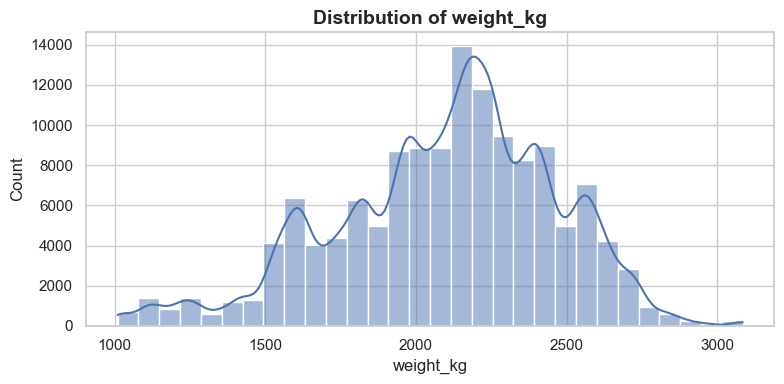

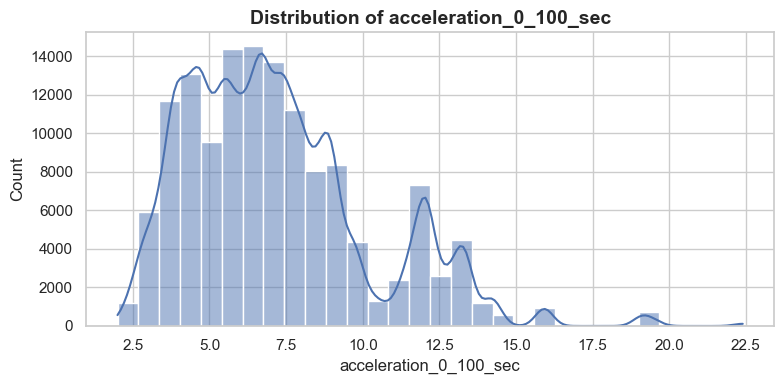

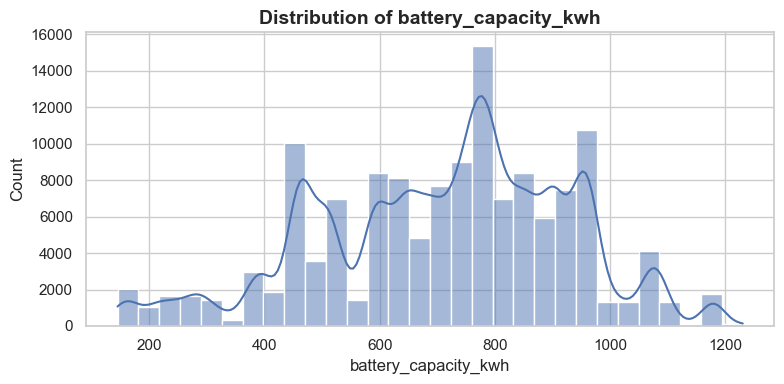

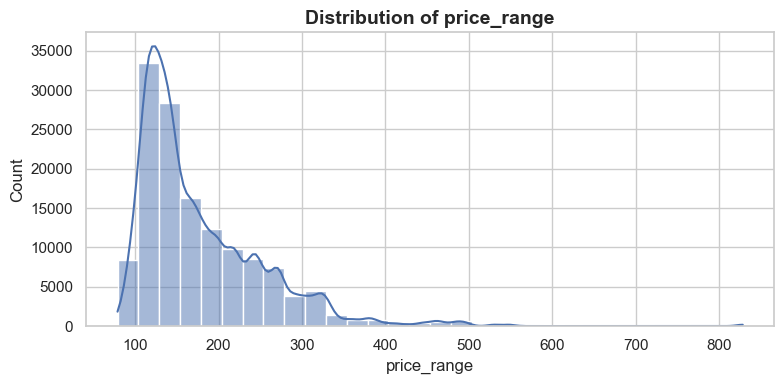

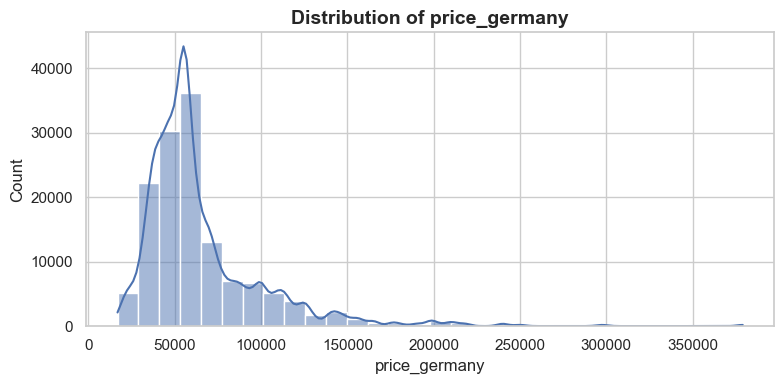

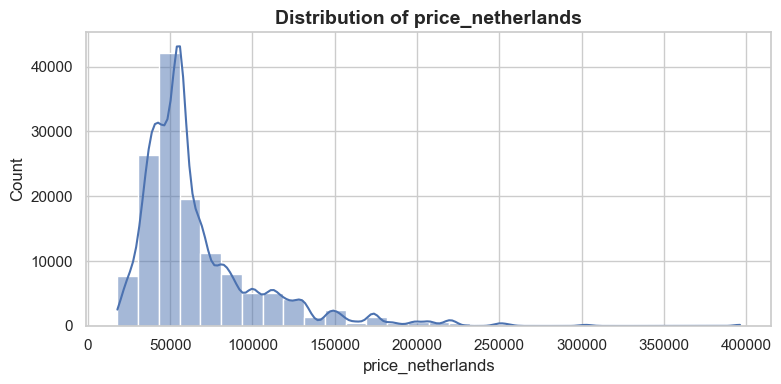

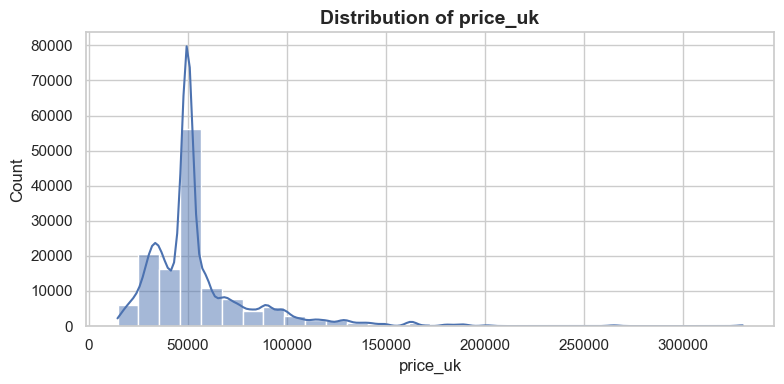

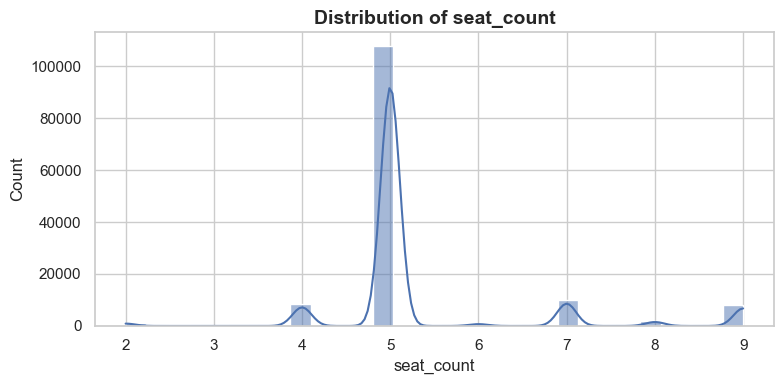

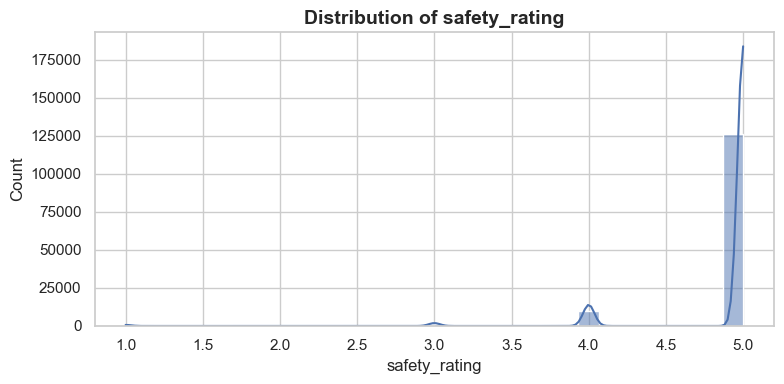

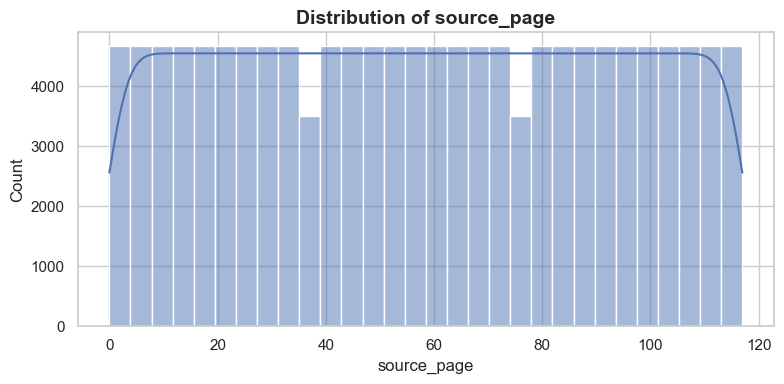

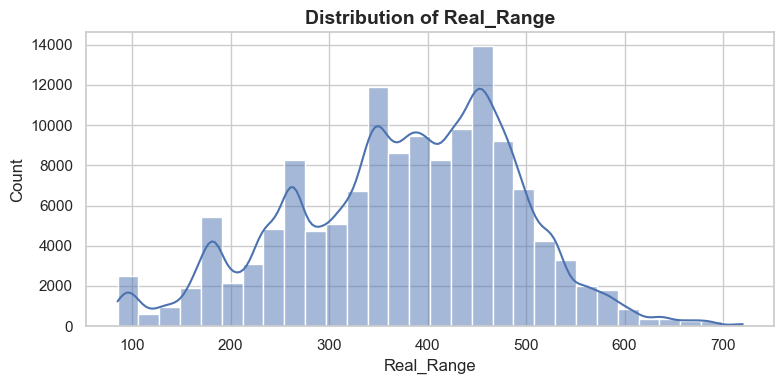

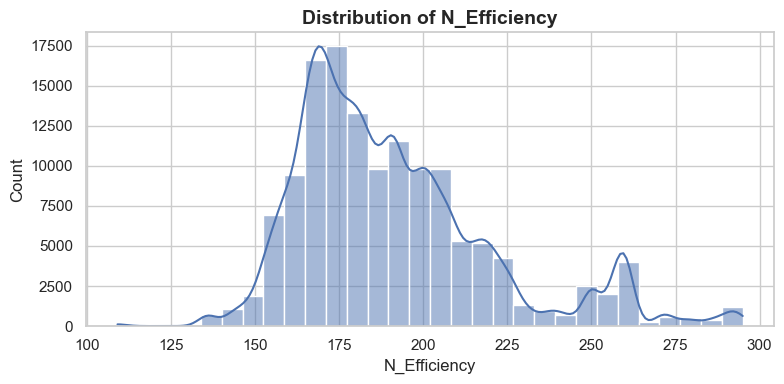

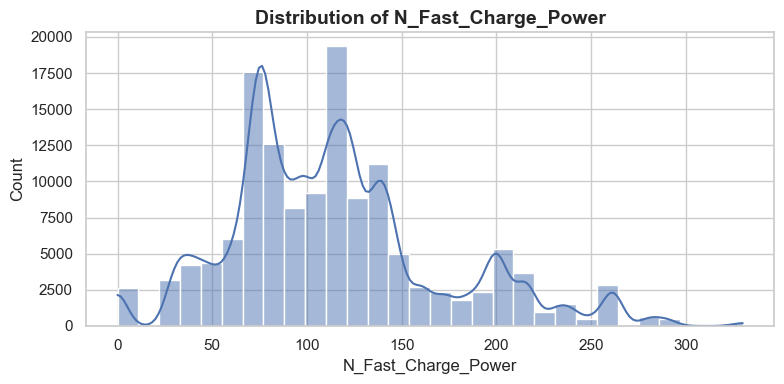

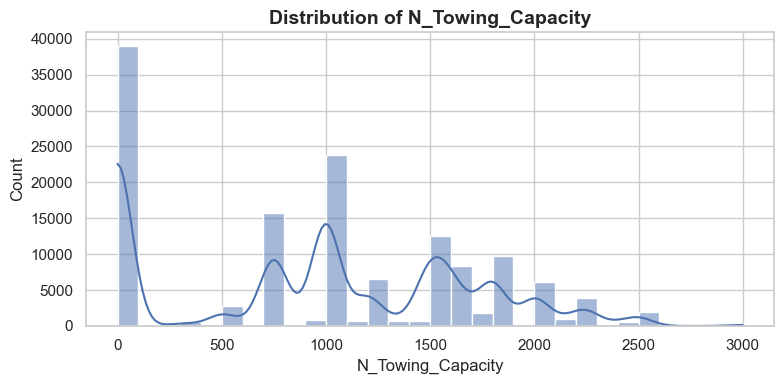

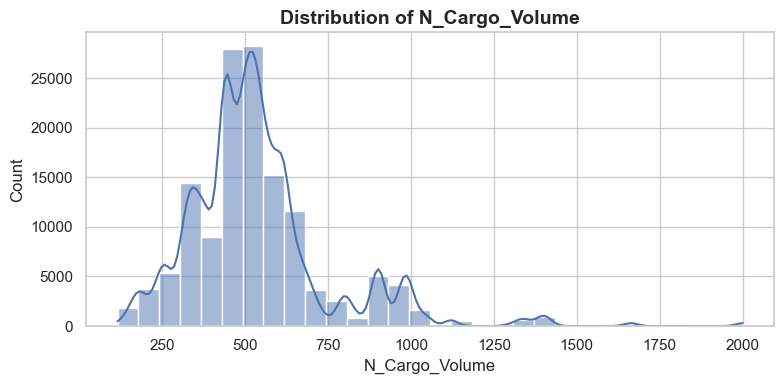

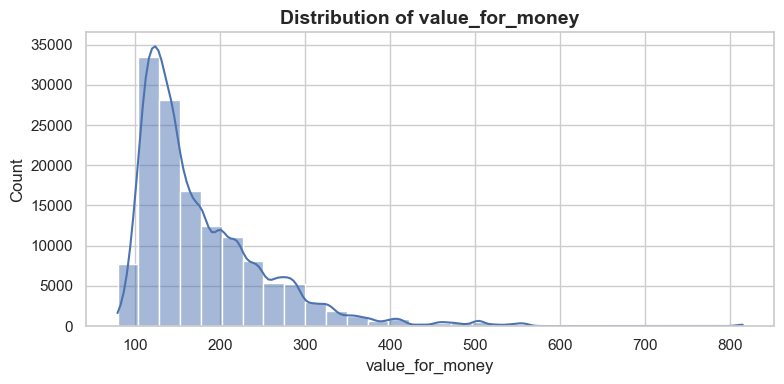

In [397]:
sns.set_theme(style="whitegrid")
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30) 
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

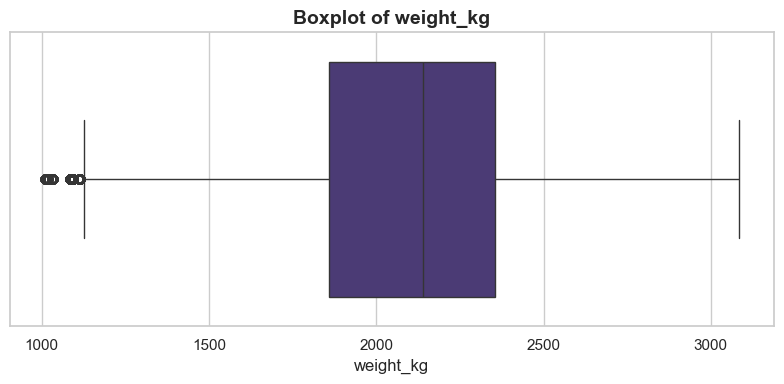

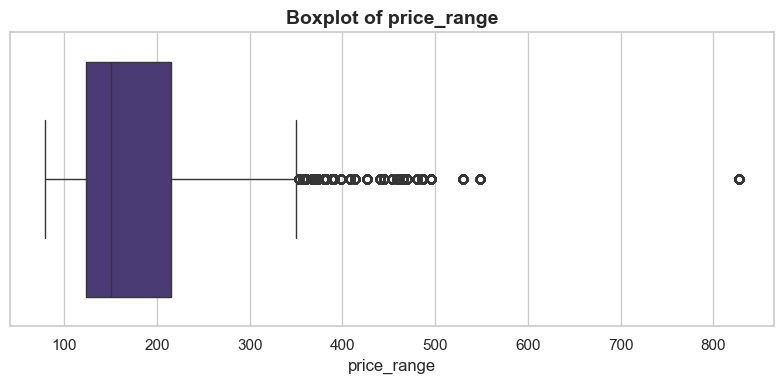

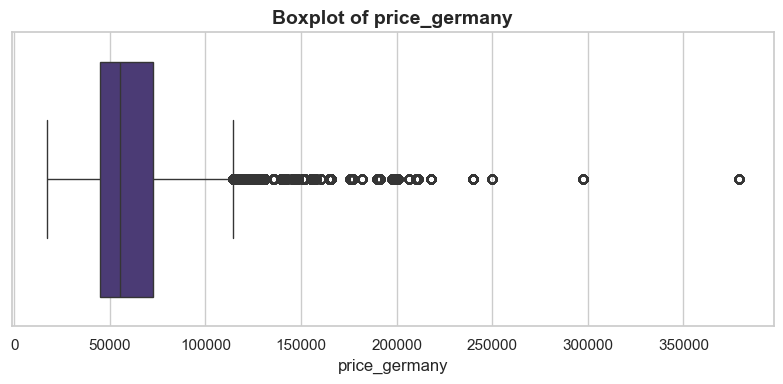

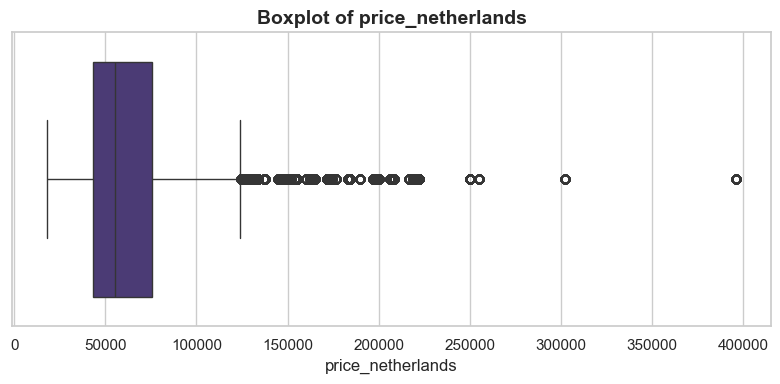

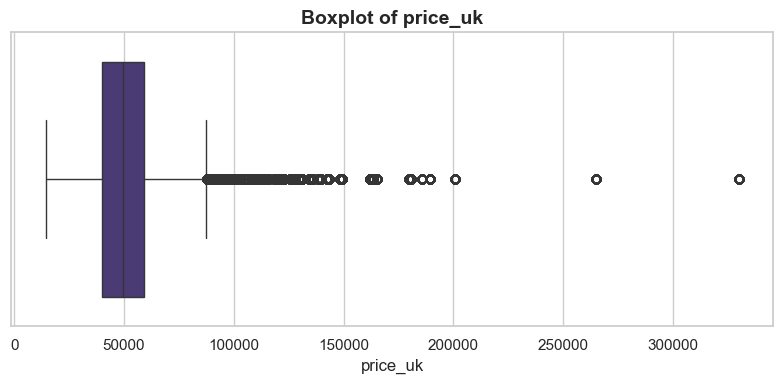

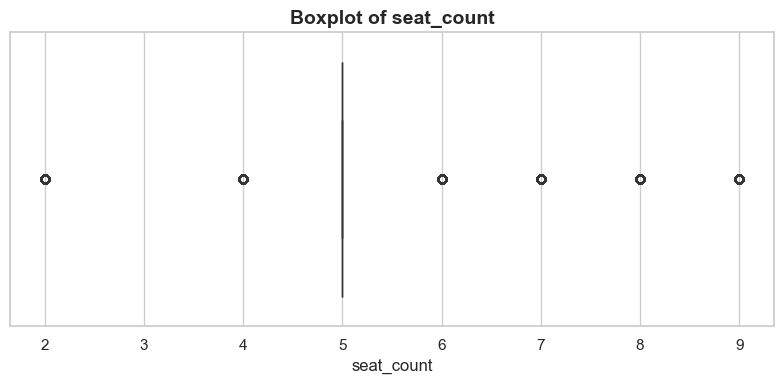

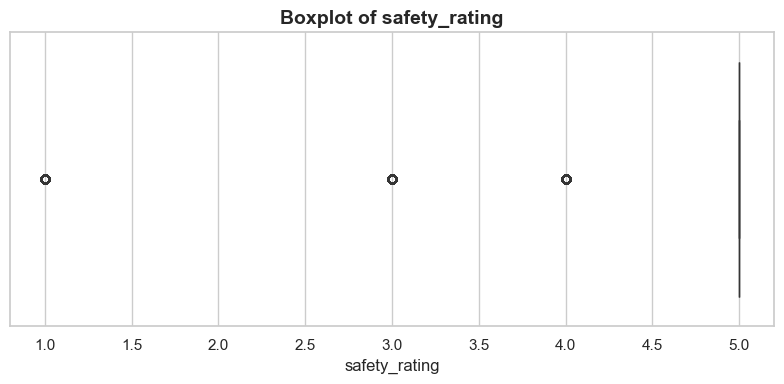

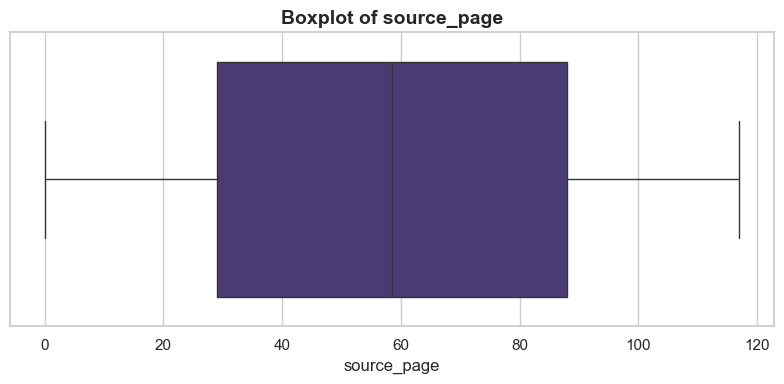

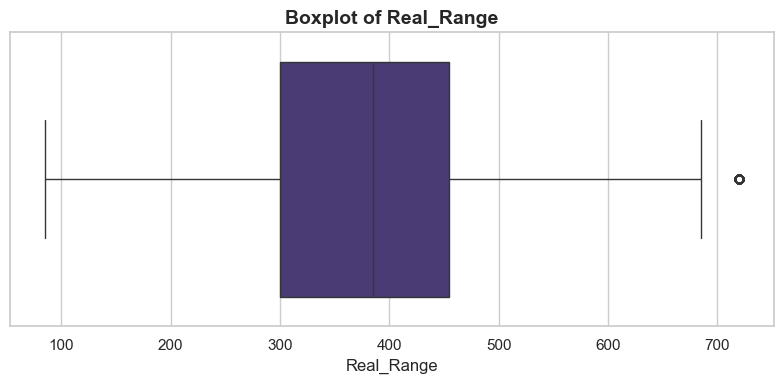

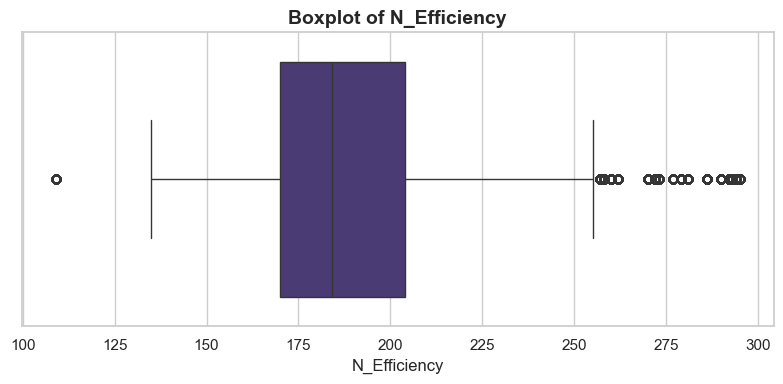

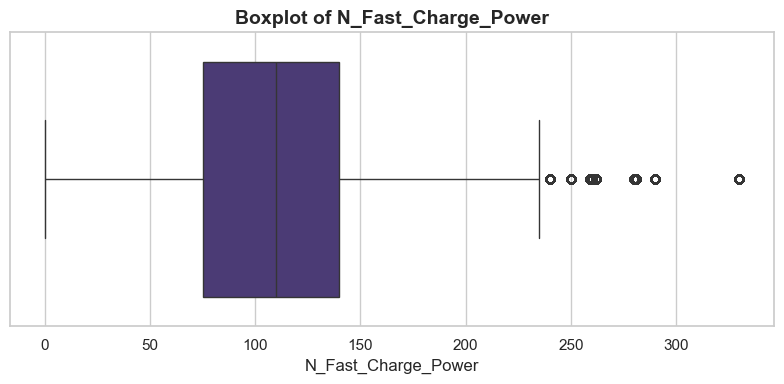

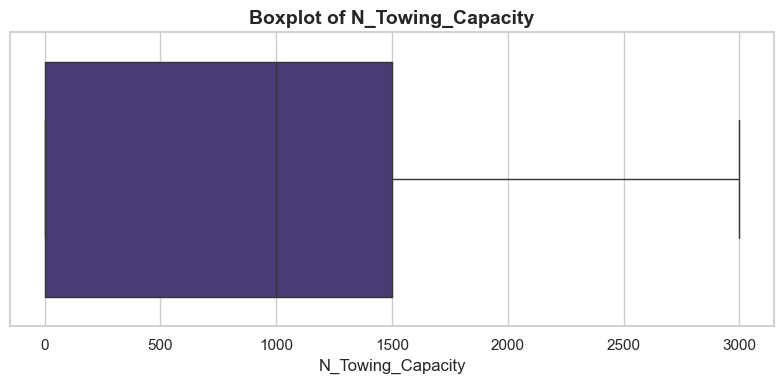

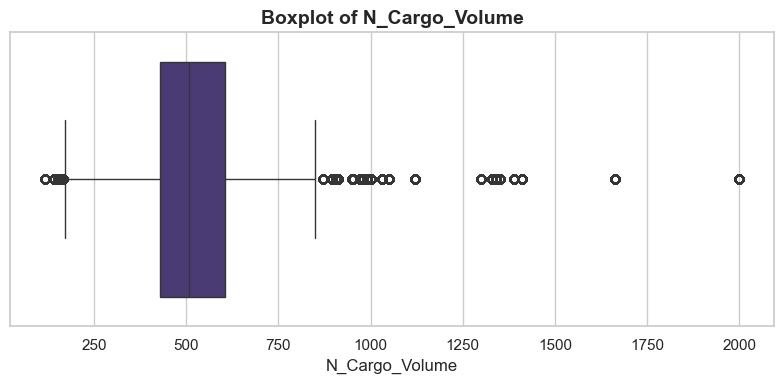

In [398]:
sns.set(style="whitegrid", palette="viridis")

num_cols = df.select_dtypes(include="int")

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()


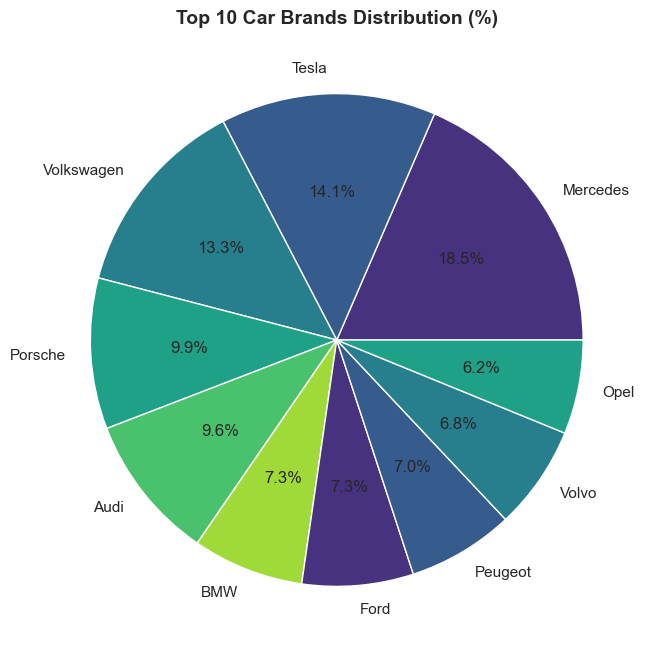

In [399]:
plt.figure(figsize=(8,8))
df['Brand'].value_counts(normalize=True).head(10).mul(100).plot(kind='pie',autopct='%1.1f%%')
plt.title("Top 10 Car Brands Distribution (%)", fontsize=14, fontweight='bold')
plt.ylabel("")  
plt.show()


<Axes: xlabel='Brand'>

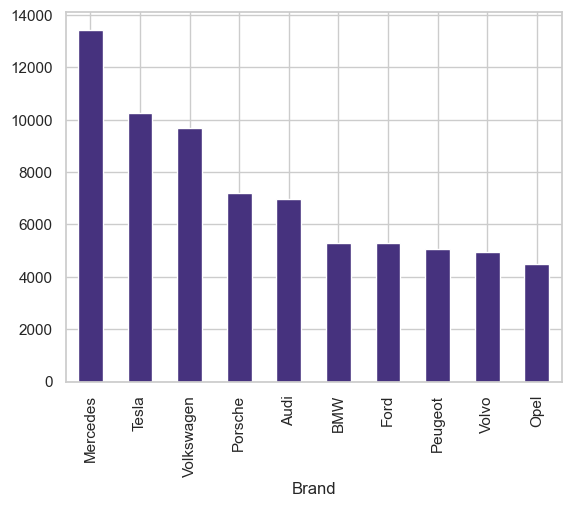

In [400]:
df['Brand'].value_counts().head(10).plot(kind ='bar')

<Axes: xlabel='Brand'>

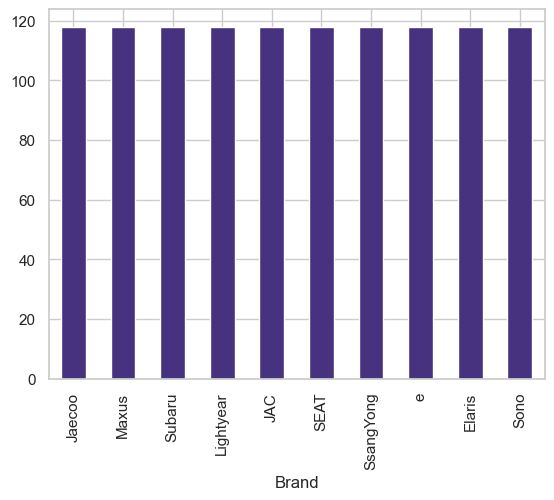

In [401]:
df['Brand'].value_counts().tail(10).plot(kind ='bar')

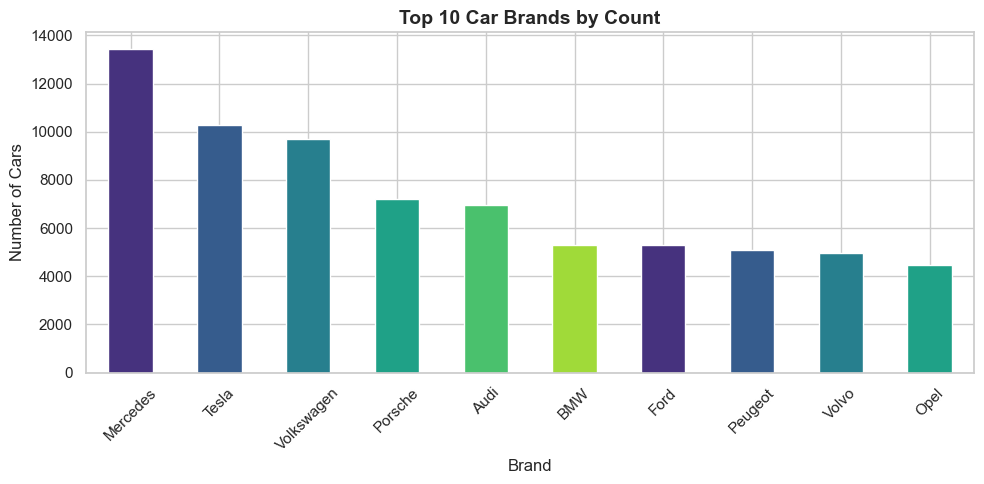

In [402]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
df['Brand'].value_counts().head(10).plot(kind='bar',
                                         color=sns.color_palette("viridis"))
plt.title("Top 10 Car Brands by Count", fontsize=14, fontweight='bold')
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

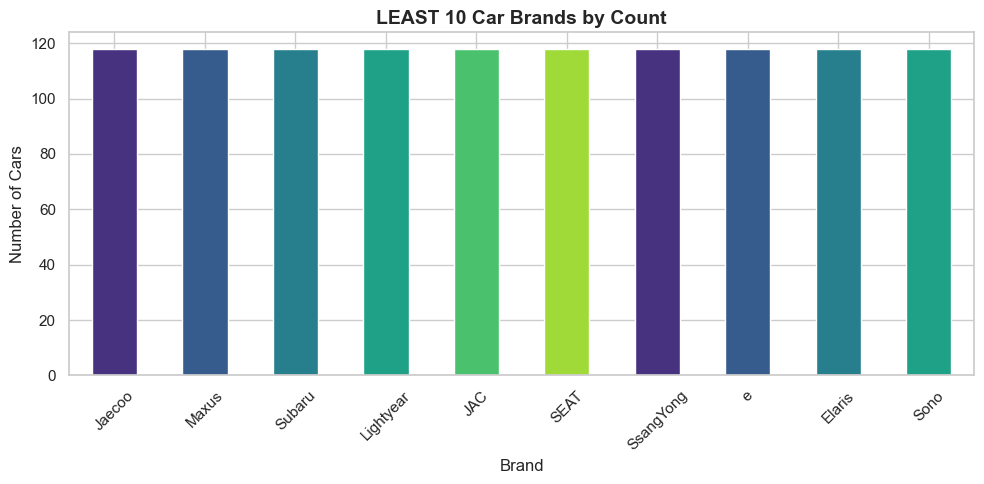

In [403]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
df['Brand'].value_counts().tail(10).plot(kind='bar',color=sns.color_palette("viridis"))
plt.title("LEAST 10 Car Brands by Count", fontsize=14, fontweight='bold')
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

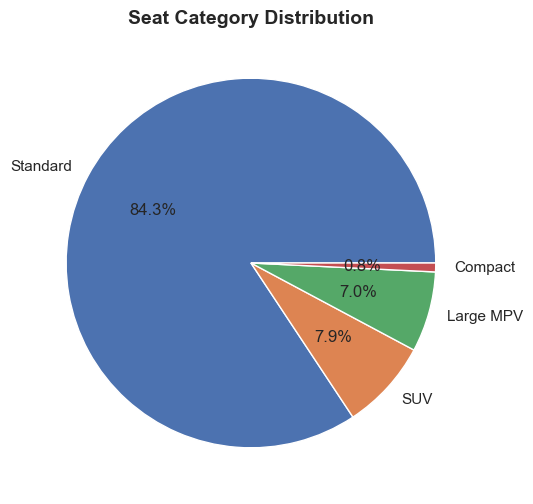

In [286]:
plt.figure(figsize=(6,6))
df['seat_category'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.title("Seat Category Distribution", fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

<Axes: xlabel='seat_category'>

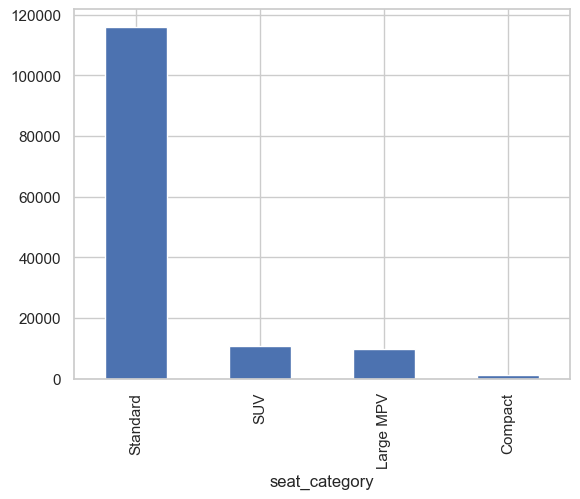

In [404]:
df['seat_category'].value_counts().plot(kind = 'bar')

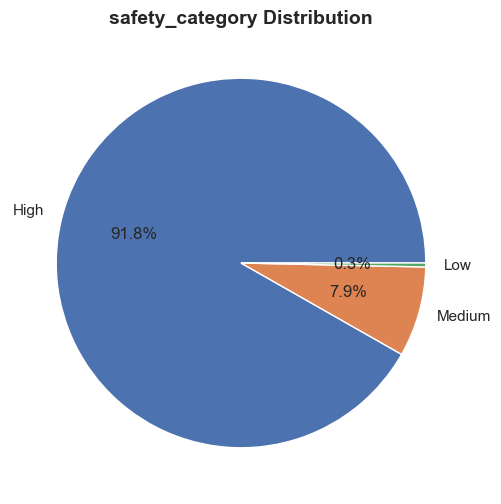

In [405]:
plt.figure(figsize=(6,6))
df['safety_category'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.title("safety_category Distribution", fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

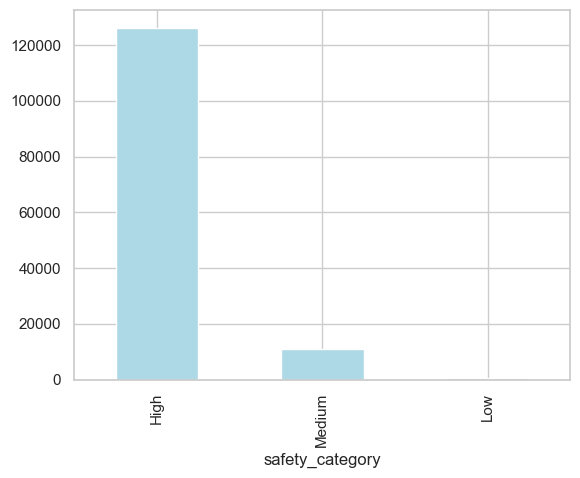

In [289]:
df['safety_category'].value_counts().plot(kind = 'bar',color = 'lightblue')
plt.show()

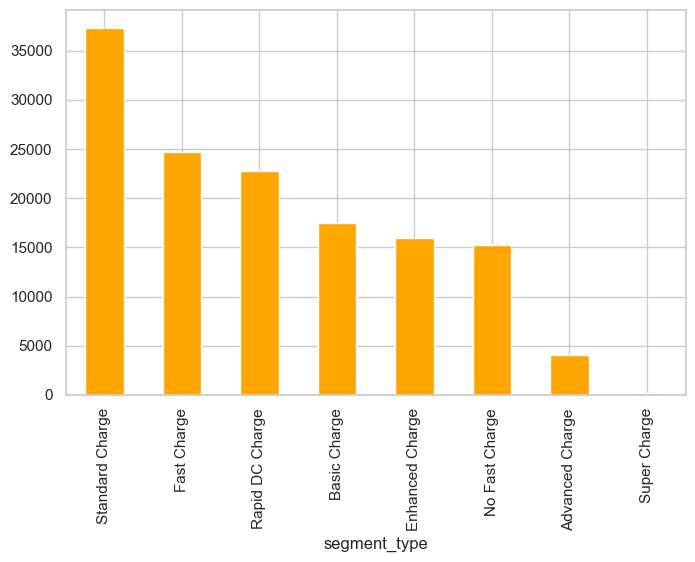

In [406]:
plt.figure(figsize = (8,5))
df['segment_type'].value_counts().plot(kind = 'bar',color = 'orange')
plt.show()

In [407]:
df['segment_type']

0             Fast Charge
1         Standard Charge
2             Fast Charge
3            Basic Charge
4         Enhanced Charge
               ...       
137583     No Fast Charge
137584     No Fast Charge
137585     No Fast Charge
137586     No Fast Charge
137587     No Fast Charge
Name: segment_type, Length: 137588, dtype: object

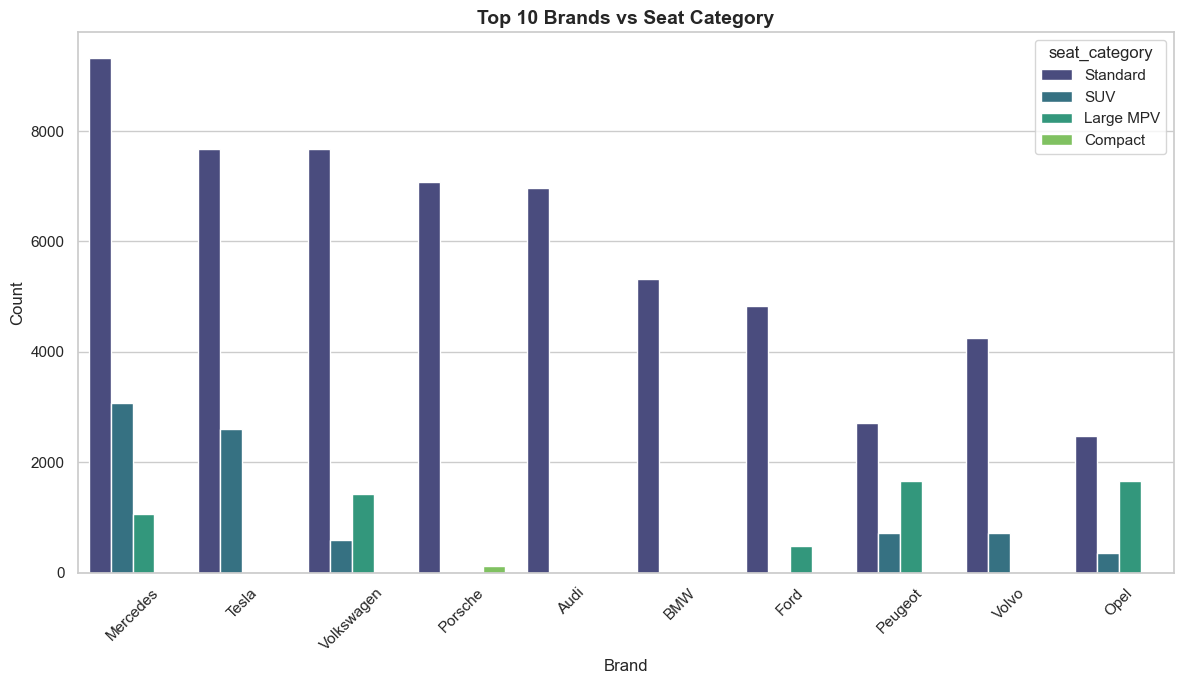

In [408]:
top10 = df['Brand'].value_counts().head(10).index
df_top = df[df['Brand'].isin(top10)]
plt.figure(figsize=(12,7))
sns.countplot(data=df_top, x='Brand', hue='seat_category',palette='viridis',order=top10) 
plt.title("Top 10 Brands vs Seat Category", fontsize=14, fontweight='bold')
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

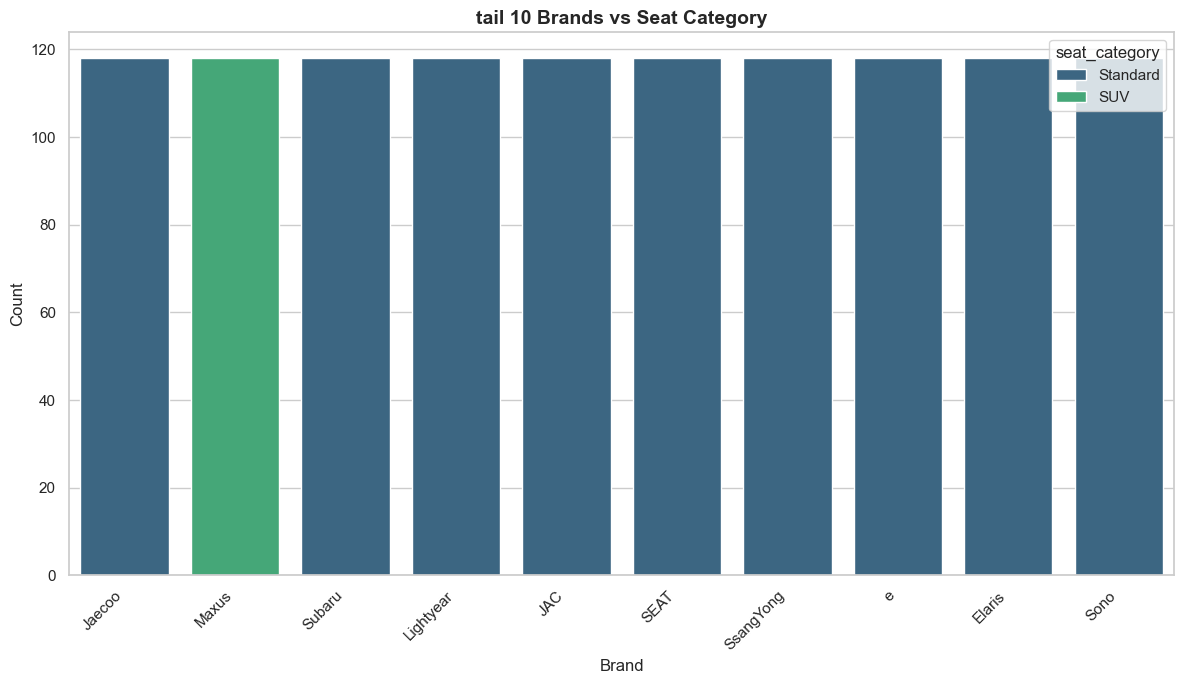

In [409]:
tail10 = df['Brand'].value_counts().tail(10).index
df_tail = df[df['Brand'].isin(tail10)]
plt.figure(figsize=(12,7))
sns.countplot(data=df_tail, x='Brand', hue='seat_category',palette='viridis',order=tail10) 
plt.title("tail 10 Brands vs Seat Category", fontsize=14, fontweight='bold')
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [410]:
brand_safety = pd.crosstab(df['Brand'],df['safety_category'])
brand_safety

safety_category,High,Low,Medium
Brand,,,
Abarth,590,0,0
Aiways,118,0,236
Alfa,236,0,0
Alpine,236,0,236
Audi,6962,0,0
...,...,...,...
XPENG,1770,0,0
Zeekr,1298,0,0
e,118,0,0


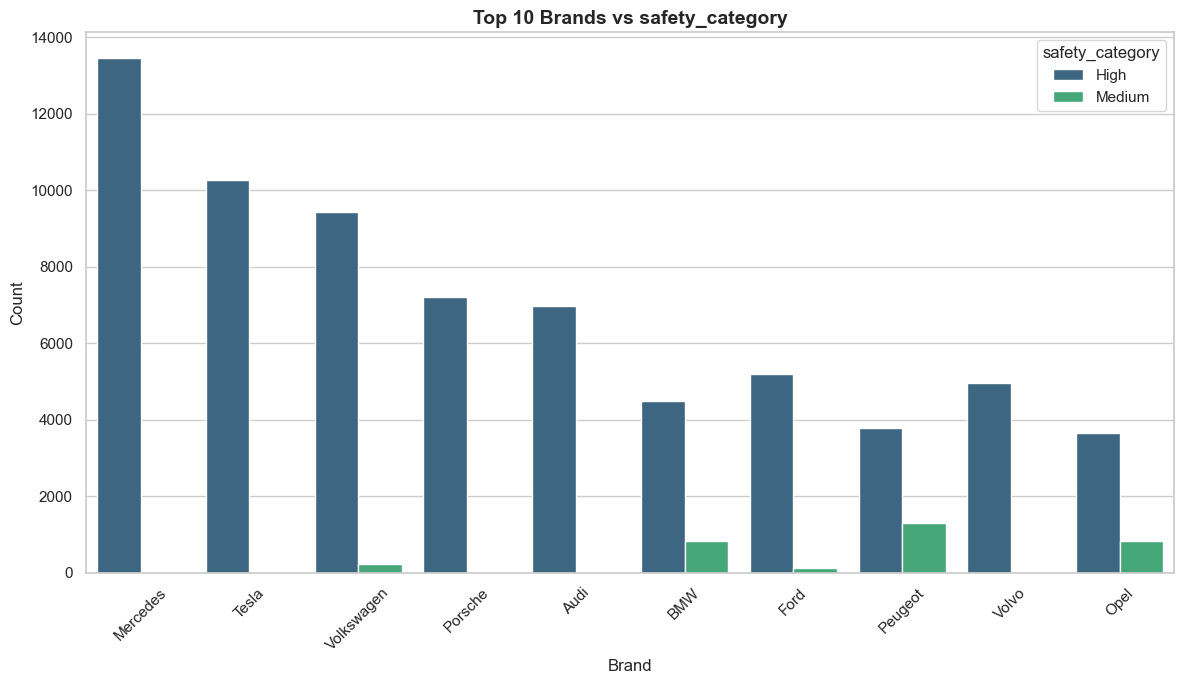

In [411]:
top10 = df['Brand'].value_counts().head(10).index
df_top = df[df['Brand'].isin(top10)]
plt.figure(figsize=(12,7))
sns.countplot(data=df_top, x='Brand', hue='safety_category',palette='viridis',order=top10) 
plt.title("Top 10 Brands vs safety_category", fontsize=14, fontweight='bold')
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

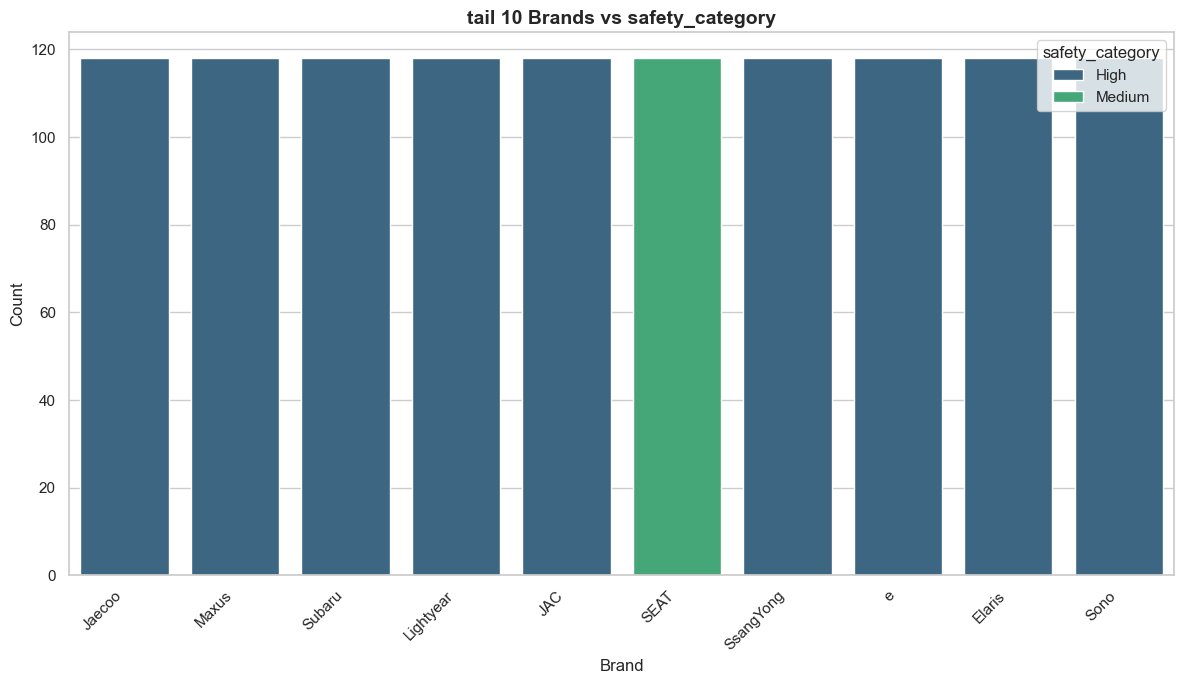

In [412]:
tail10 = df['Brand'].value_counts().tail(10).index
df_tail = df[df['Brand'].isin(tail10)]
plt.figure(figsize=(12,7))
sns.countplot(data=df_tail, x='Brand', hue='safety_category', 
              palette='viridis',order=tail10) 
plt.title("tail 10 Brands vs safety_category", fontsize=14, fontweight='bold')
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='seat_category', ylabel='Real_Range'>

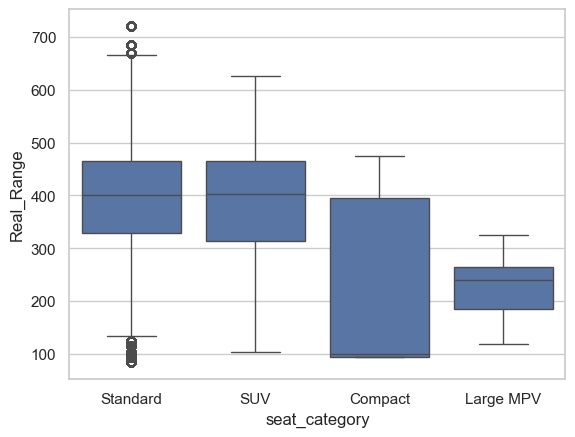

In [413]:
sns.boxplot(data=df,x='seat_category',y='Real_Range')

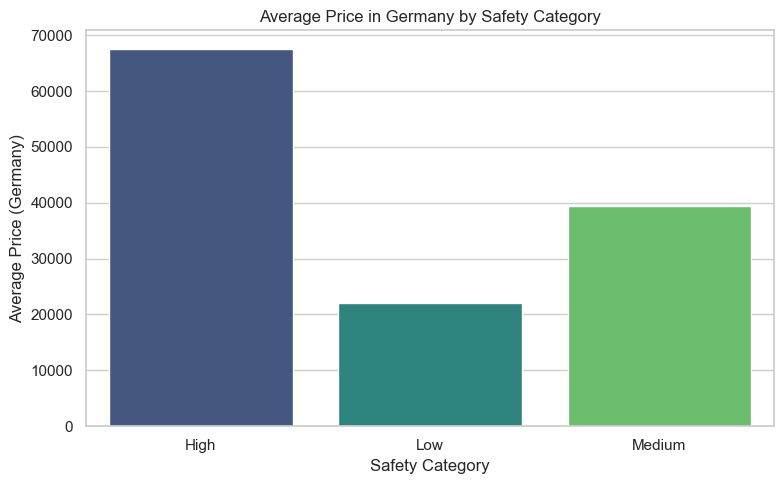

In [414]:
mean_price = df.groupby('safety_category')['price_germany'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=mean_price, x='safety_category', y='price_germany', palette='viridis')
plt.title("Average Price in Germany by Safety Category")
plt.xlabel("Safety Category")
plt.ylabel("Average Price (Germany)")
plt.tight_layout()
plt.show()

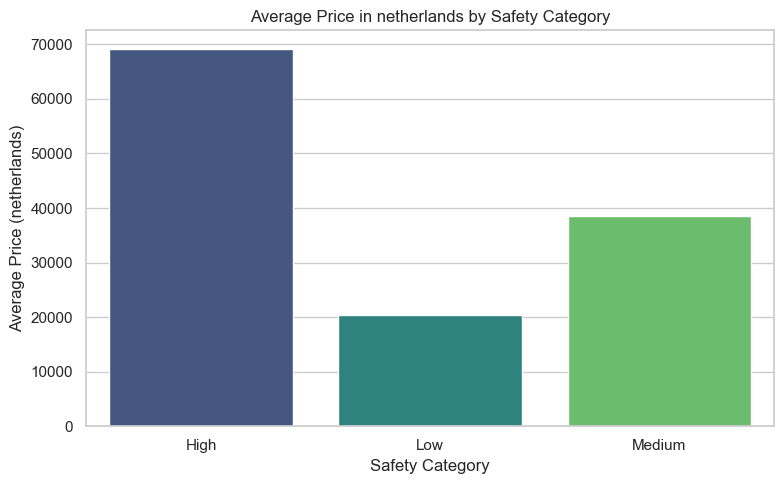

In [415]:
mean_price = df.groupby('safety_category')['price_netherlands'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=mean_price, x='safety_category', y='price_netherlands', palette='viridis')
plt.title("Average Price in netherlands by Safety Category")
plt.xlabel("Safety Category")
plt.ylabel("Average Price (netherlands)")
plt.tight_layout()
plt.show()

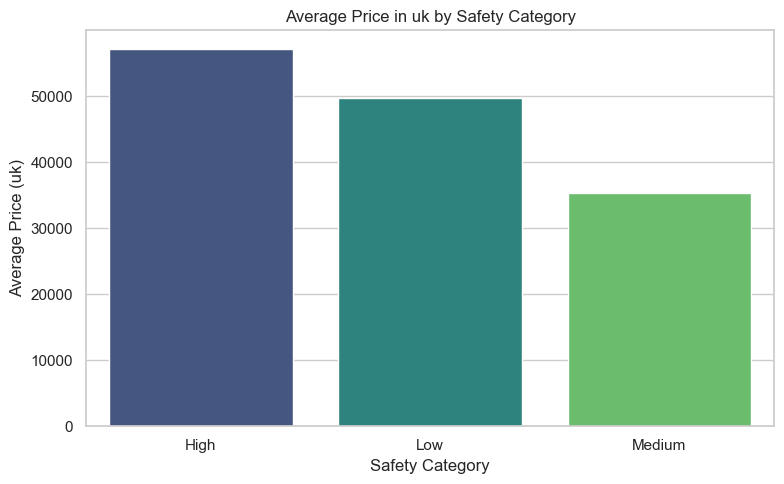

In [416]:
mean_price = df.groupby('safety_category')['price_uk'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=mean_price, x='safety_category', y='price_uk', palette='viridis')
plt.title("Average Price in uk by Safety Category")
plt.xlabel("Safety Category")
plt.ylabel("Average Price (uk)")
plt.tight_layout()
plt.show()

In [417]:
brand_price = df.groupby('Brand')['price_germany'].mean().sort_values()

In [418]:
most_affordable = brand_price.head(5).reset_index()
most_expensive = brand_price.tail(5).reset_index()

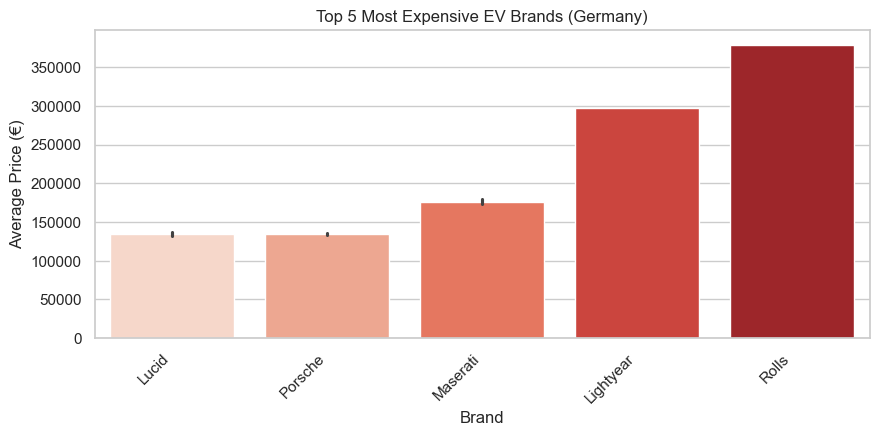

In [419]:
top_df = df[df['Brand'].isin(most_expensive['Brand'])]
plt.figure(figsize=(10,4))
sns.barplot(data=top_df, x='Brand', y='price_germany', palette="Reds",order=most_expensive['Brand'])
plt.title("Top 5 Most Expensive EV Brands (Germany)")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45, ha='right')
plt.show()

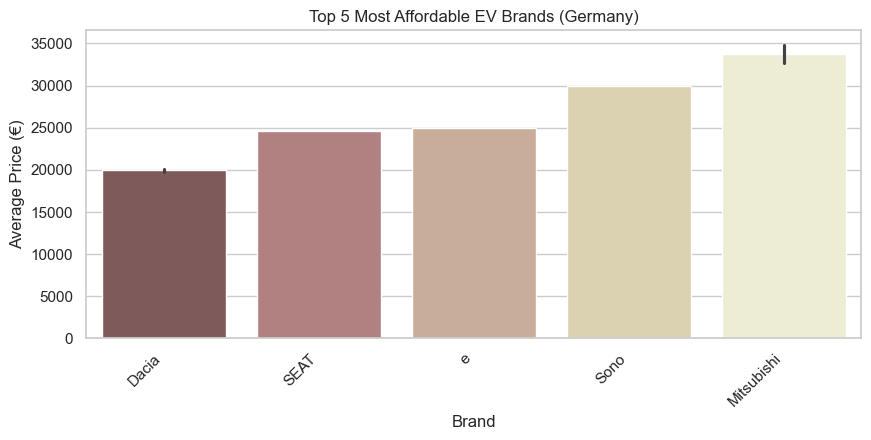

In [420]:
bottom_df = df[df['Brand'].isin(most_affordable['Brand'])]
plt.figure(figsize=(10,4))
sns.barplot(data=bottom_df, x='Brand', y='price_germany', palette="pink",order=most_affordable['Brand'])
plt.title("Top 5 Most Affordable EV Brands (Germany)")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45, ha='right')
plt.show()

In [421]:
df[['battery_capacity_kwh','Real_Range','price_germany']].corr()

,battery_capacity_kwh,Real_Range,price_germany
battery_capacity_kwh,1.000000,0.899206,0.646912
Real_Range,0.899206,1.000000,0.531706
price_germany,0.646912,0.531706,1.000000


In [422]:
corr_battery = df['battery_capacity_kwh'].corr(df['price_germany'])
corr_range = df['Real_Range'].corr(df['price_germany'])
print("Battery vs Price:", corr_battery)
print("Range vs Price:", corr_range)


Battery vs Price: 0.6469122701286827
Range vs Price: 0.5317061691307006


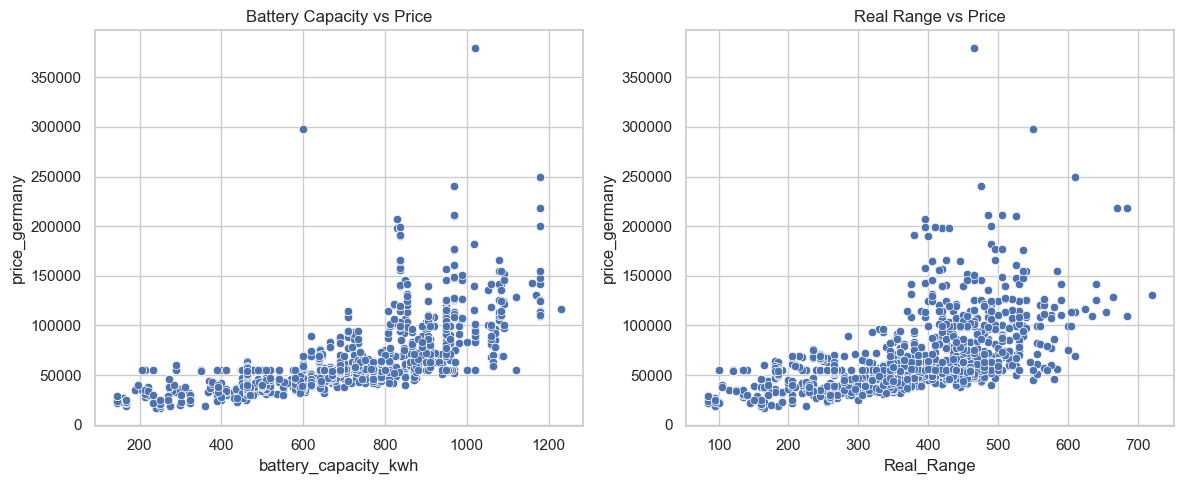

In [423]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='battery_capacity_kwh', y='price_germany', data=df)
plt.title("Battery Capacity vs Price")

plt.subplot(1,2,2)
sns.scatterplot(x='Real_Range', y='price_germany', data=df)
plt.title("Real Range vs Price")
plt.tight_layout()
plt.show()


Battery capacity tends to have a stronger relationship with price than real range, which suggests that manufacturers price vehicles based on battery size more than efficiency. However, performance and range still contribute to premium pricing.

In [424]:
price_range = df.groupby('seat_category')['price_germany'].agg(['min','max'])
price_range

,min,max
seat_category,,
Compact,21940,240000
Large MPV,46230,76517
SUV,37602,156900
Standard,16900,379015


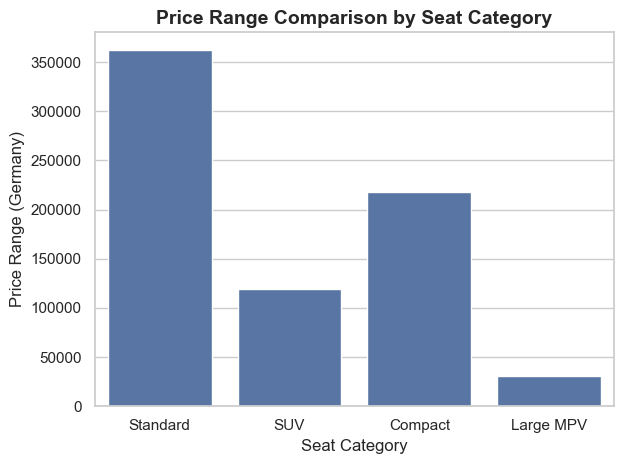

In [425]:
sns.barplot(x=df['seat_category'], y=df['price_germany'], 
            estimator=lambda x: x.max()-x.min())
plt.title("Price Range Comparison by Seat Category", fontsize=14, fontweight='bold')
plt.xlabel("Seat Category")
plt.ylabel("Price Range (Germany)")
plt.tight_layout()
plt.show()

If SUV has the largest variation in price → It's a wide-market segment (budget to luxury)

If Large MPV has high range → These are niche/family/luxury EVs

If Compact has low variation → More budget-friendly, stable segment

In [426]:
df[['price_germany','price_netherlands','price_uk']].mean()

price_germany        65129.006861
price_netherlands    66531.584906
price_uk             55374.678388
dtype: float64

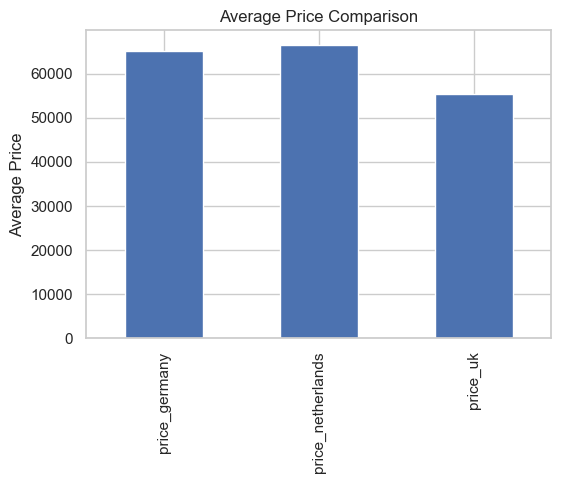

In [427]:
df[['price_germany','price_netherlands','price_uk']].mean().plot(kind='bar', figsize=(6,4))
plt.title("Average Price Comparison")
plt.ylabel("Average Price")
plt.show()


In [428]:
df[['battery_capacity_kwh','Real_Range']].corr()

,battery_capacity_kwh,Real_Range
battery_capacity_kwh,1.000000,0.899206
Real_Range,0.899206,1.000000


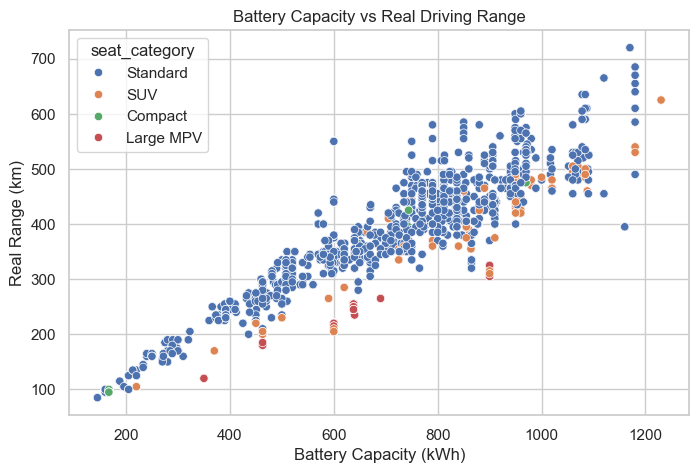

In [429]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='battery_capacity_kwh', y='Real_Range', hue='seat_category')
plt.title("Battery Capacity vs Real Driving Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Real Range (km)")
plt.show()

In [430]:
df[['weight_kg','acceleration_0_100_sec']].corr()

,weight_kg,acceleration_0_100_sec
weight_kg,1.000000,-0.566397
acceleration_0_100_sec,-0.566397,1.000000


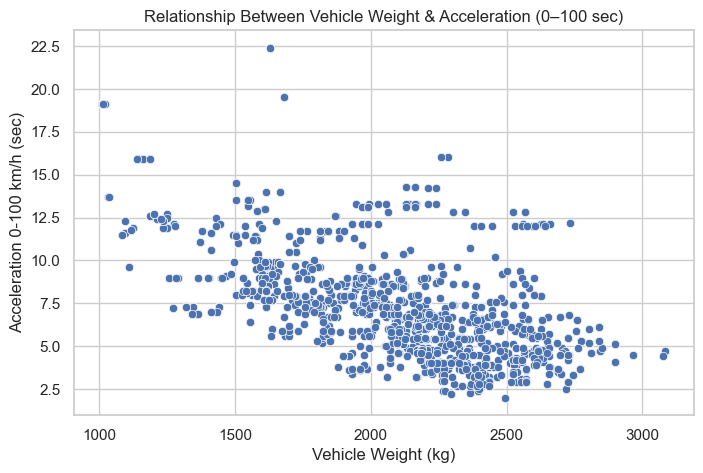

In [431]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='weight_kg', y='acceleration_0_100_sec')
plt.title("Relationship Between Vehicle Weight & Acceleration (0–100 sec)")
plt.xlabel("Vehicle Weight (kg)")
plt.ylabel("Acceleration 0-100 km/h (sec)")
plt.show()

In [432]:
df['weight_kg']

0         2360
1         1726
2         2072
3         1645
4         2440
          ... 
137583    1813
137584    1932
137585    1989
137586    1989
137587    1989
Name: weight_kg, Length: 137588, dtype: int64

In [433]:
avg_price = df.groupby('segment_type')['price_germany'].mean().reset_index()
avg_price

,segment_type,price_germany
0,Advanced Charge,23131.294118
1,Basic Charge,39697.500000
2,Enhanced Charge,80173.096296
3,Fast Charge,59265.354067
4,No Fast Charge,55446.317829
5,Rapid DC Charge,121775.538860
6,Standard Charge,48350.212025
7,Super Charge,67490.000000


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137588 entries, 0 to 137587
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   car_name                137588 non-null  object 
 1   car_id                  137588 non-null  object 
 2   real_range_km           137588 non-null  object 
 3   efficiency_wh_km        137588 non-null  object 
 4   weight_kg               137588 non-null  int64  
 5   acceleration_0_100_sec  137588 non-null  float64
 6   battery_capacity_kwh    137588 non-null  float64
 7   fast_charge_power_kw    137588 non-null  object 
 8   towing_capacity_kg      137588 non-null  object 
 9   cargo_volume_liters     137588 non-null  object 
 10  price_range             137588 non-null  int64  
 11  price_germany           137588 non-null  int64  
 12  price_netherlands       137588 non-null  int64  
 13  price_uk                137588 non-null  int64  
 14  segment_type        

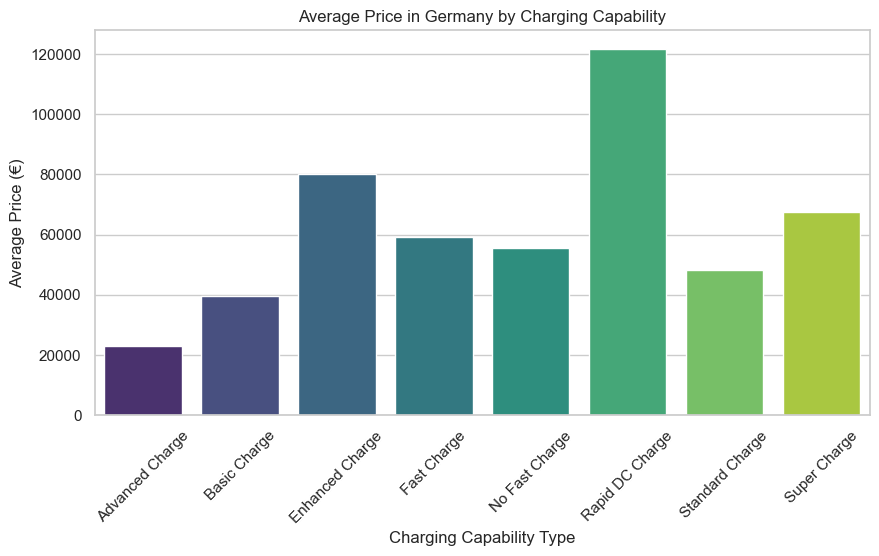

In [435]:
plt.figure(figsize=(10,5))
sns.barplot(data=avg_price, x='segment_type', y='price_germany',palette = 'viridis')
plt.title("Average Price in Germany by Charging Capability")
plt.xlabel("Charging Capability Type")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.show()

In [436]:
fast = df.groupby('Brand')['acceleration_0_100_sec'].min().sort_values().head(10)
fast

Brand
Lucid       2.0
Porsche     2.2
Tesla       2.4
Audi        2.5
Maserati    2.7
Lotus       2.8
Polestar    3.2
MG          3.2
Cadillac    3.3
Mercedes    3.4
Name: acceleration_0_100_sec, dtype: float64

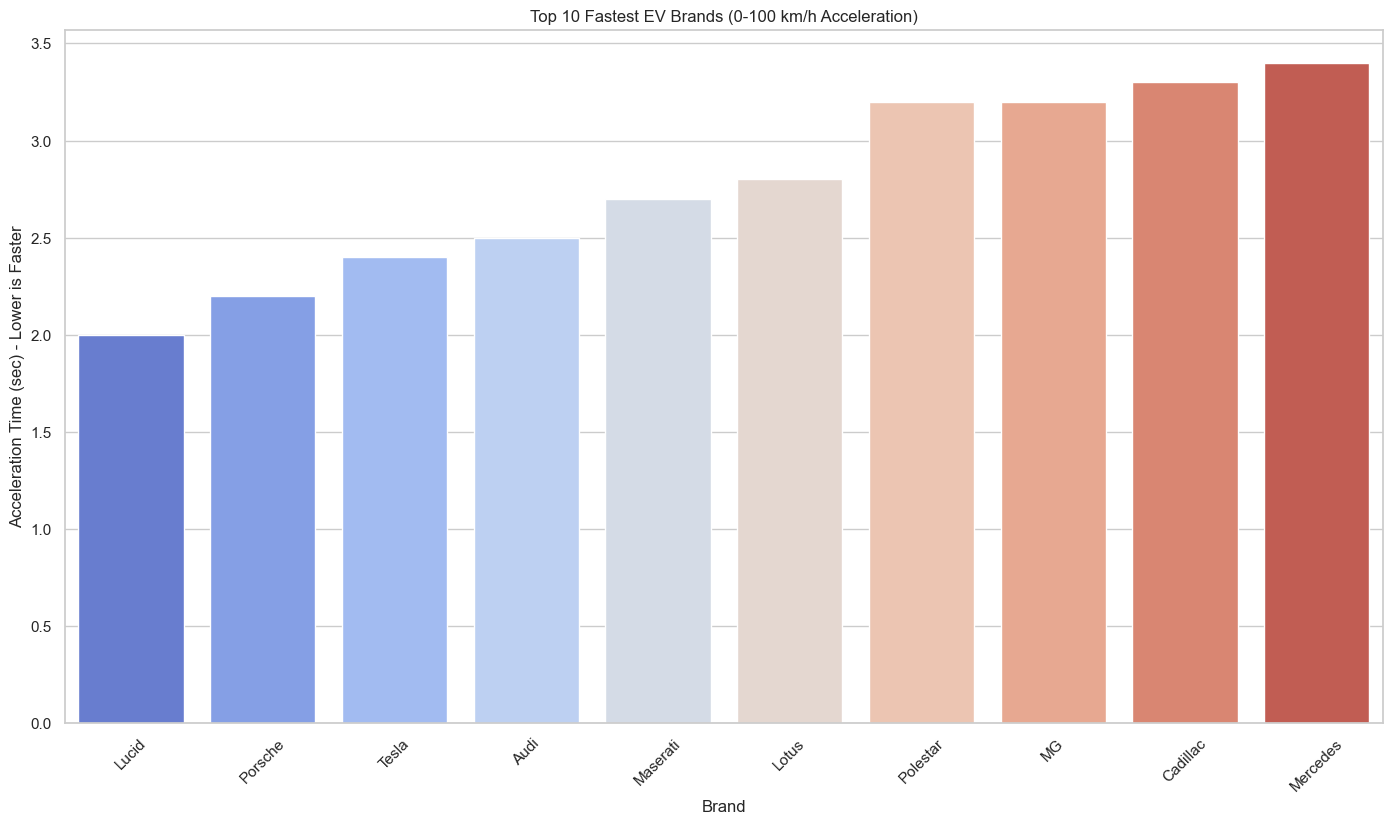

In [437]:
plt.figure(figsize=(17,9))
sns.barplot(x=fast.index, y=fast.values, palette="coolwarm",order=fast.index)
plt.title("Top 10 Fastest EV Brands (0-100 km/h Acceleration)")
plt.ylabel("Acceleration Time (sec) - Lower is Faster")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.show()

In [438]:
suv_df = df[df['seat_category'] == 'SUV']
suv_df

,car_name,car_id,real_range_km,efficiency_wh_km,weight_kg,acceleration_0_100_sec,battery_capacity_kwh,fast_charge_power_kw,towing_capacity_kg,cargo_volume_liters,...,Brand,Real_Range,N_Efficiency,N_Fast_Charge_Power,N_Towing_Capacity,N_Cargo_Volume,CAT_number_of_seats,seat_category,safety_category,value_for_money
15,Tesla Model Y Long Range AWDTesla Model Y Long...,/car/1619/Tesla-Model-Y-Long-Range-AWD,445 km,169 Wh/km,2054,5.0,750.0,124 kW,1.600 kg,971 L,...,Tesla,445,169,124,1600,971,7,SUV,High,125.775281
45,BYD TANG FlagshipBYD TANG Flagship,/car/2095/BYD-TANG-Flagship,460 km,237 Wh/km,2705,4.9,1088.0,100 kW,1.500 kg,235 L,...,BYD,460,237,100,1500,235,7,SUV,High,151.336957
75,Mercedes-Benz EQB 250+Mercedes-Benz EQB 250+,/car/1988/Mercedes-Benz-EQB-250plus,415 km,170 Wh/km,2105,8.9,705.0,90 kW,1.400 kg,495 L,...,Mercedes,415,170,90,1400,495,7,SUV,High,128.949398
97,Mercedes-Benz GLB 250+Mercedes-Benz GLB 250+,/car/3406/Mercedes-Benz-GLB-250plus,465 km,183 Wh/km,2200,7.4,850.0,235 kW,1.500 kg,667 L,...,Mercedes,465,183,235,1500,667,7,SUV,High,126.984946
146,Kia EV9 99.8 kWh AWDKia EV9 99.8 kWh AWD,/car/1835/Kia-EV9-998-kWh-AWD,435 km,221 Wh/km,2625,6.0,960.0,194 kW,2.500 kg,385 L,...,Kia,435,221,194,2500,385,7,SUV,High,158.597701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137533,Mercedes-Benz EQV 250 LongMercedes-Benz EQV 25...,/car/1542/Mercedes-Benz-EQV-250-Long,205 km,293 Wh/km,2576,12.0,600.0,60 kW,0 kg,1.030 L,...,Mercedes,205,293,60,0,1030,7,SUV,High,331.980488
137535,Tesla Model X Ludicrous PerformanceTesla Model...,/car/1200/Tesla-Model-X-Ludicrous-Performance,440 km,216 Wh/km,2572,2.9,950.0,100 kW,2.250 kg,unknown,...,Tesla,440,216,100,2250,507,7,SUV,High,126.259091
137550,Mercedes-Benz EQV 250 Extra-LongMercedes-Benz ...,/car/2130/Mercedes-Benz-EQV-250-Extra-Long,210 km,286 Wh/km,2641,12.0,600.0,60 kW,0 kg,1.410 L,...,Mercedes,210,286,60,0,1410,7,SUV,High,282.680952
137574,Mercedes-Benz EQV 250 Extra-LongMercedes-Benz ...,/car/1543/Mercedes-Benz-EQV-250-Extra-Long,205 km,293 Wh/km,2606,12.0,600.0,60 kW,0 kg,1.410 L,...,Mercedes,205,293,60,0,1410,7,SUV,High,336.336585


Brand
Hyundai       2200.000000
Lucid         2050.000000
NIO           2000.000000
Cadillac      2000.000000
Tesla         1993.181818
Volvo         1916.666667
Kia           1860.000000
BYD           1500.000000
Renault       1500.000000
Volkswagen    1320.000000
Name: N_Towing_Capacity, dtype: float64
Axes(0.125,0.11;0.775x0.77)


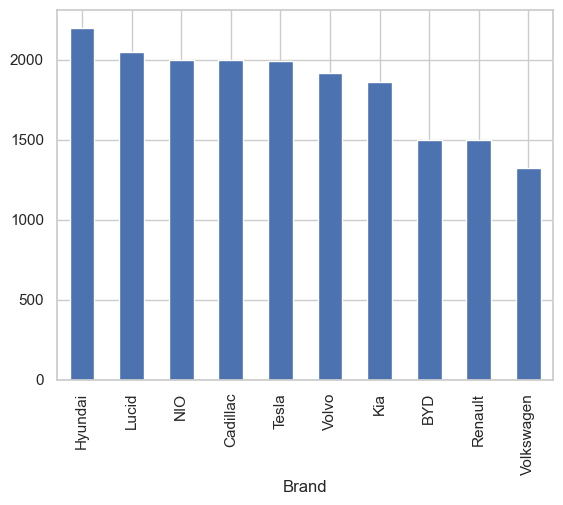

In [439]:
top_towing = suv_df.groupby('Brand')['N_Towing_Capacity'].mean().sort_values(ascending=False).head(10)
print(top_towing)
print(top_towing.plot(kind = 'bar'))

In [440]:
df['N_Cargo_Volume'].unique()

array([ 578,  363,  971,  400,  500,  385,  185,  506,  440,  485,  682,
        326,  952,  430,  325,  338,  577,  345,  510, 1330,  470,  495,
        698,  566,  493,  490,  380,  620,  361,  605,  542,  235,  210,
        526,  660,  543,  453,  341,  649,  351,  798,  571,  332,  581,
        536,  651,  532,  448,  545,  910,  360,  555,  585,  556,  446,
        342,  416,  260,  565,  667,  308,  435,  529,  460,  520,  420,
        425,  438,  480,  434,  340,  357,  479,  451,  461,  839,  211,
        505,  731,  600,  410,  468,  441,  804,  552,  437,  390,  584,
        267,  635,  452,  551,  539,  608,  541,  588,  475,  355,  677,
        343,  350,  366,  590,  871, 1663,  895,  894,  544,  200,  310,
        427,  348, 1340,  491,  702,  697,  352,  265,  540,  496, 1121,
        507,  622,  174,  249,  631,  572,  250,  624,  280,  450,  522,
        525,  703,  309,  300,  171,  619,  579,  521,  657,  238,  645,
        907,  516,  270,  501,  228,  550,  423,  7

Brand
Lucid         1663.000000
Nissan        1606.333333
Volkswagen    1208.600000
Toyota         950.000000
Citroën        928.000000
Opel           809.000000
Mercedes       790.269231
Volvo          703.000000
Peugeot        578.500000
Tesla          546.454545
Name: N_Cargo_Volume, dtype: float64
Axes(0.125,0.11;0.775x0.77)


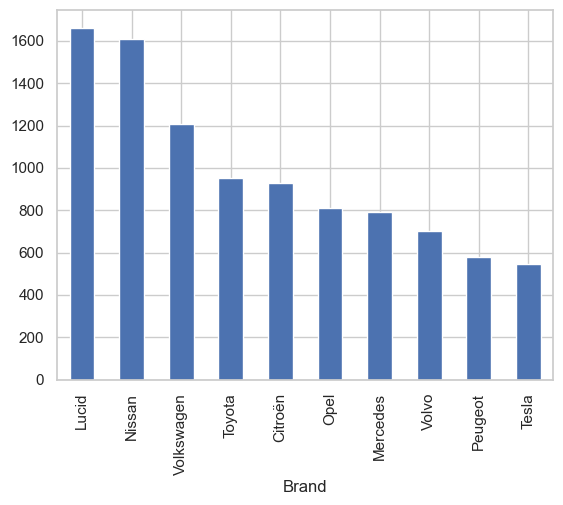

In [441]:
top_cargo = suv_df.groupby('Brand')['N_Cargo_Volume'].mean().sort_values(ascending=False).head(10)
print(top_cargo)
print(top_cargo.plot(kind = 'bar'))

In [442]:
safety_price = df.groupby('safety_category')[['price_germany','price_netherlands','price_uk']].mean()

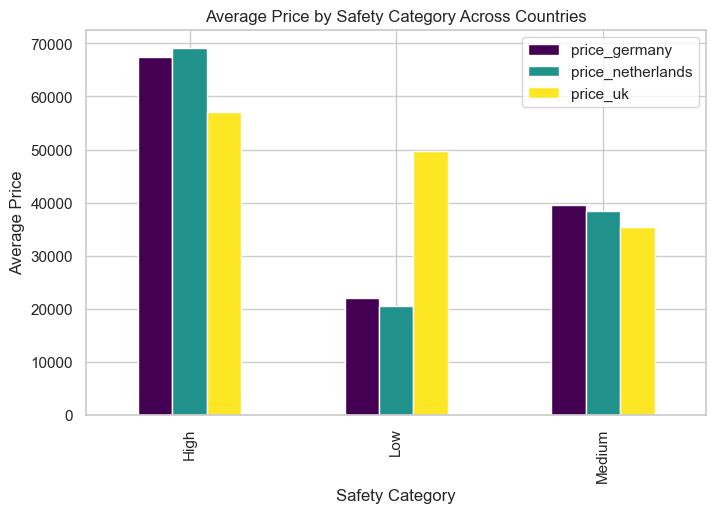

In [443]:
safety_price.plot(kind='bar', figsize=(8,5), colormap='viridis')
plt.title("Average Price by Safety Category Across Countries")
plt.ylabel("Average Price")
plt.xlabel("Safety Category")
plt.show()

In [444]:
SF_TOP = df.groupby('Brand')['safety_rating'].mean().head().sort_values(ascending=False)
SF_TOP

Brand
Abarth    5.000000
Alfa      5.000000
Audi      5.000000
Alpine    4.500000
Aiways    3.666667
Name: safety_rating, dtype: float64

In [445]:
SF_Tail = df.groupby('Brand')['safety_rating'].mean().head().sort_values(ascending=True)
SF_Tail

Brand
Aiways    3.666667
Alpine    4.500000
Abarth    5.000000
Alfa      5.000000
Audi      5.000000
Name: safety_rating, dtype: float64

In [449]:
df['safety_category'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [451]:
df['Brand'].unique()

array(['BMW', 'MG', 'Tesla', 'BYD', 'CUPRA', 'Fiat', 'Mercedes', 'Kia',
       'Renault', 'Leapmotor', 'Volvo', 'Hyundai', 'Škoda', 'Rolls',
       'Zeekr', 'Mazda', 'Audi', 'Volkswagen', 'XPENG', 'Ford', 'Changan',
       'Lucid', 'Dacia', 'Toyota', 'Citroën', 'Mini', 'Lynk', 'Hongqi',
       'Jaecoo', 'Peugeot', 'Dongfeng', 'Geely', 'KGM', 'TOGG', 'Omoda',
       'Polestar', 'Nissan', 'Opel', 'Jeep', 'Smart', 'Porsche',
       'firefly', 'Honda', 'Voyah', 'Subaru', 'Lexus', 'Alpine', 'Jaguar',
       'NIO', 'Maxus', 'Lotus', 'Suzuki', 'Maserati', 'GWM', 'Cadillac',
       'Alfa', 'Mitsubishi', 'DS', 'Lancia', 'Lightyear', 'Seres',
       'Fisker', 'Genesis', 'VinFast', 'Abarth', 'Aiways', 'Skywell',
       'SEAT', 'JAC', 'SsangYong', 'e', 'Elaris', 'Sono', 'ORA'],
      dtype=object)